# Electronic fraud payment detection

# Electronic payment

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/electronic_payment.csv')

# Exploratory Data Analysis

In [ ]:
df.head()

step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0      0.0             0.0  
1  M2044282225             0.0             0.0      0.0             0.0  
2   C553264065             0.0             0.0      1.0             0.0  
3    C38997010         21182.0             0.0      1.0             0.0  
4  M1230701703             0.0             0.0      0.0             0.0

In [ ]:
df.tail()

step      type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
316248    16  CASH_OUT  167414.06  C1704395302        12298.0            0.00   
316249    16   PAYMENT    5773.11  C1467331845        15998.0        10224.89   
316250    16  TRANSFER  288449.12   C918100509        11390.0            0.00   
316251    16   CASH_IN  108170.87  C1801631966       359717.0       467887.87   
316252    16  TRANSFER  462903.86   C289793322       314483.0            0.00   

           nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
316248  C1847747372      1425405.47      1928006.99      0.0             0.0  
316249   M195867992            0.00            0.00      0.0             0.0  
316250   C193311237        94684.49       788492.84      0.0             0.0  
316251  C1090666185       149931.00        41760.13      0.0             0.0  
316252   C947932814             NaN             NaN      NaN             NaN

In [ ]:
df.shape

(316253, 11)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.nunique()

step                  16
type                   5
amount            312699
nameOrig          316234
oldbalanceOrg     148703
newbalanceOrig    135909
nameDest          141427
oldbalanceDest    176330
newbalanceDest     87647
isFraud                2
isFlaggedFraud         1
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 316252 entries, 0 to 316251
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            316252 non-null  int64  
 1   type            316252 non-null  object 
 2   amount          316252 non-null  float64
 3   nameOrig        316252 non-null  object 
 4   oldbalanceOrg   316252 non-null  float64
 5   newbalanceOrig  316252 non-null  float64
 6   nameDest        316252 non-null  object 
 7   oldbalanceDest  316252 non-null  float64
 8   newbalanceDest  316252 non-null  float64
 9   isFraud         316252 non-null  float64
 10  isFlaggedFraud  316252 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 29.0+ MB


In [ ]:
df.describe()

step        amount  oldbalanceOrg  newbalanceOrig  \
count  316252.000000  3.162520e+05   3.162520e+05    3.162520e+05   
mean       11.657643  1.756674e+05   9.016404e+05    9.207552e+05   
std         2.735792  2.982491e+05   2.910580e+06    2.947989e+06   
min         1.000000  3.000000e-01   0.000000e+00    0.000000e+00   
25%        10.000000  1.288546e+04   0.000000e+00    0.000000e+00   
50%        12.000000  7.879256e+04   1.860850e+04    0.000000e+00   
75%        14.000000  2.317438e+05   1.836200e+05    2.224254e+05   
max        16.000000  1.000000e+07   3.890000e+07    3.890000e+07   

       oldbalanceDest  newbalanceDest        isFraud  isFlaggedFraud  
count    3.162520e+05    3.162520e+05  316252.000000        316252.0  
mean     9.800271e+05    1.195192e+06       0.000591             0.0  
std      2.370407e+06    2.589138e+06       0.024310             0.0  
min      0.000000e+00    0.000000e+00       0.000000             0.0  
25%      0.000000e+00    0.000000e+00       0.000000             0.0  
50%      9.023247e+04    1.958236e+05       0.000000             0.0  
75%      8.642745e+05    1.236743e+06       0.000000             0.0  
max      4.130000e+07    4.140000e+07       1.000000             0.0

In [ ]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['type', 'nameOrig', 'nameDest'], dtype='object')

Numerical type columns:
Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')


In [ ]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [ ]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [ ]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['type']
Non-Categorical Features: ['nameOrig', 'nameDest']
Discrete Features: ['isFraud', 'isFlaggedFraud']
Continuous Features: ['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


#Explanatory Data Analysis

In [ ]:
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

isFraud
[0. 1.]

isFlaggedFraud
[0.]



In [ ]:
for i in discrete:
    print(df[i].value_counts())
    print()

isFraud
0.0    316065
1.0       187
Name: count, dtype: int64

isFlaggedFraud
0.0    316252
Name: count, dtype: int64



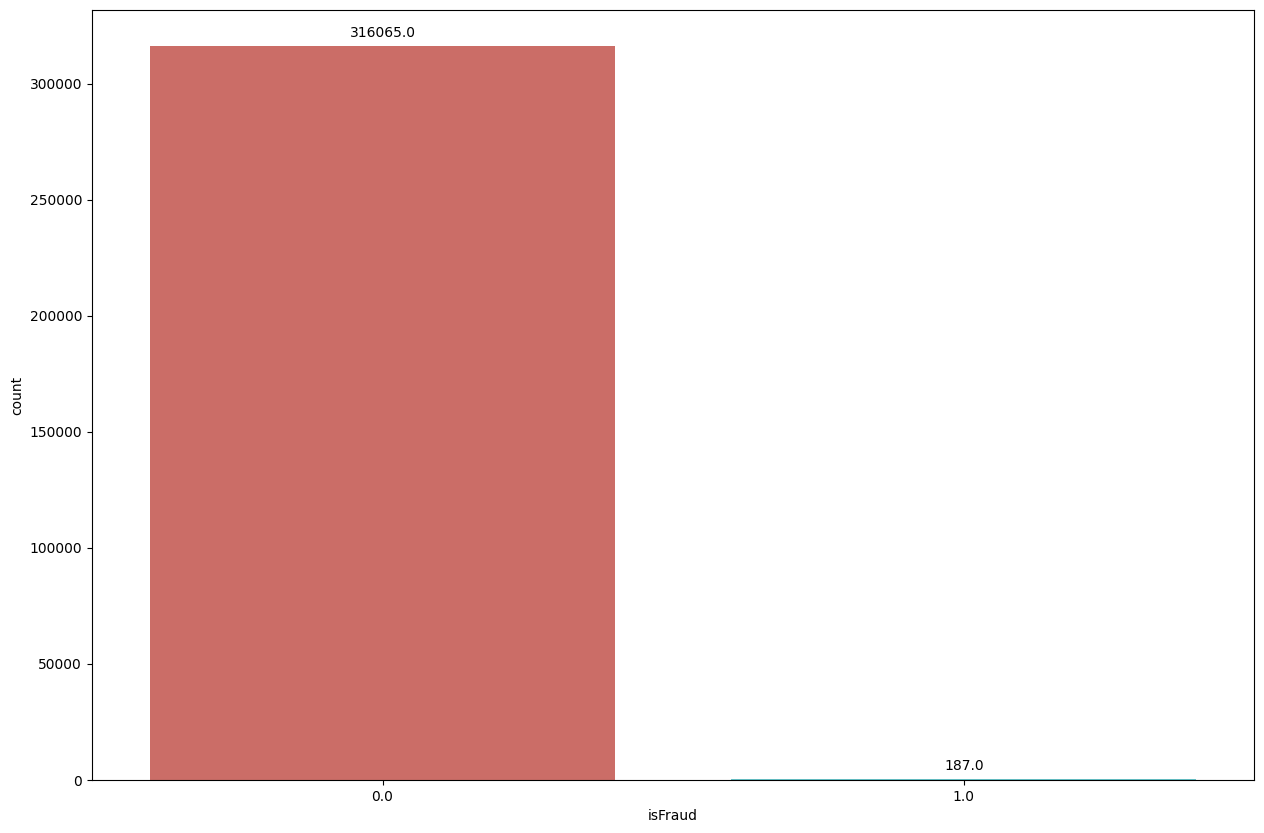

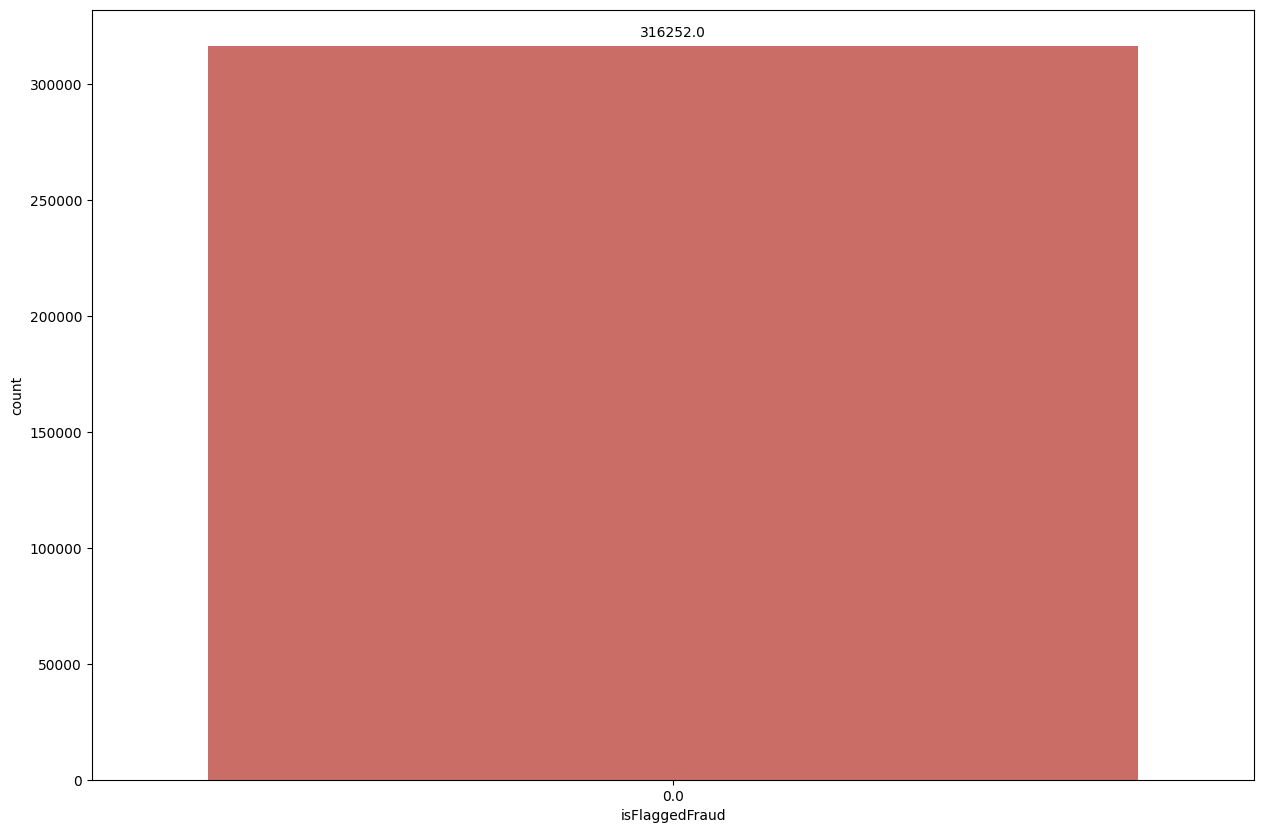

In [ ]:
for i in discrete:
    plt.figure(figsize=(15, 10))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

In [ ]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

type
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']



In [ ]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

type
type
CASH_OUT    111288
PAYMENT     108839
CASH_IN      67446
TRANSFER     26358
DEBIT         2321
Name: count, dtype: int64



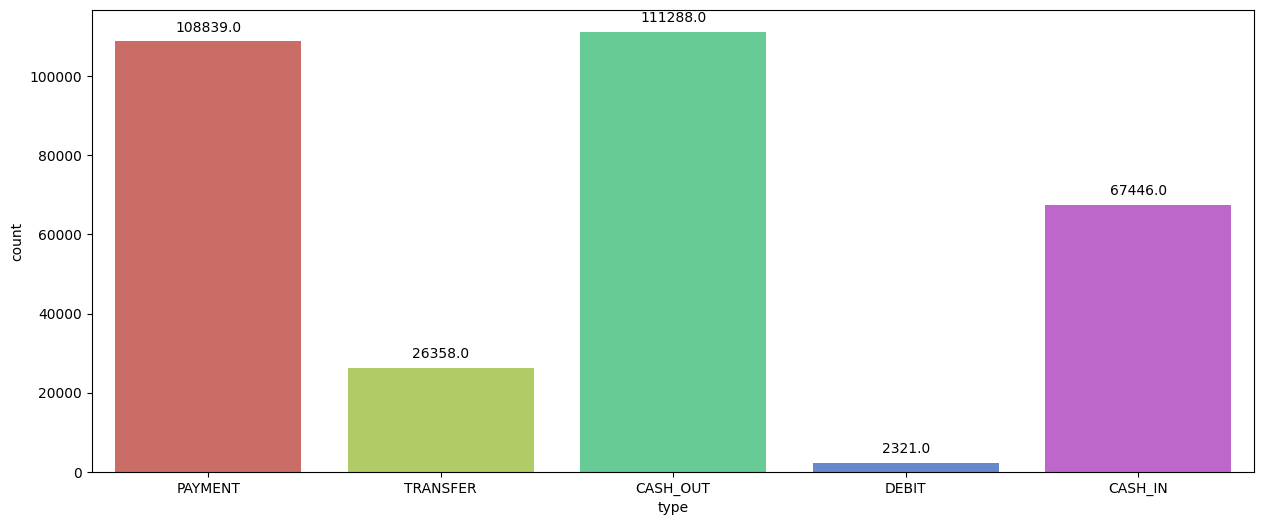

In [ ]:
for i in categorical:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center', va='center')

    plt.show()

In [ ]:
for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

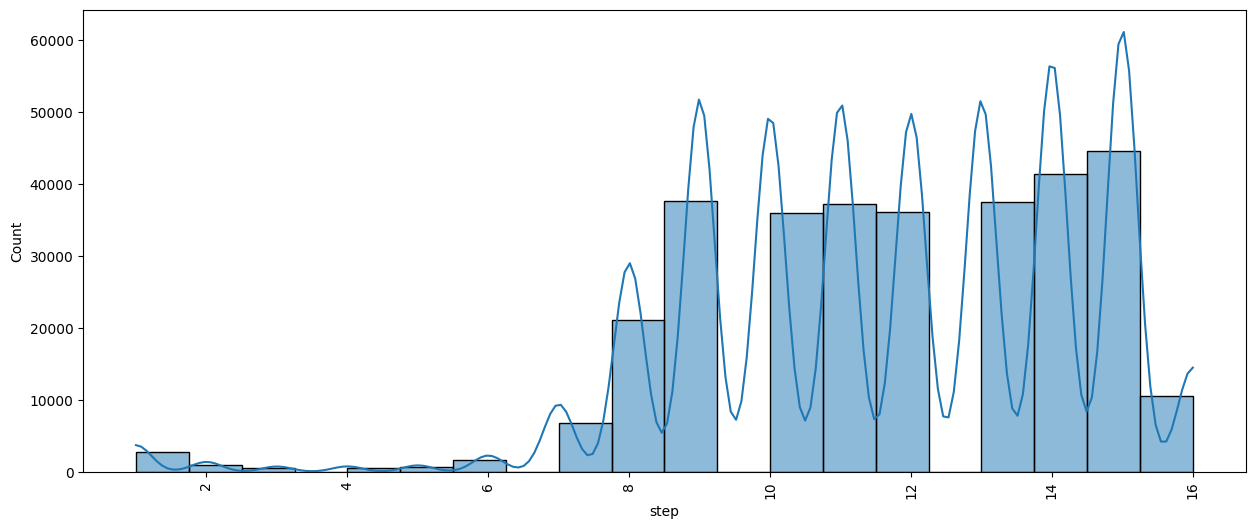

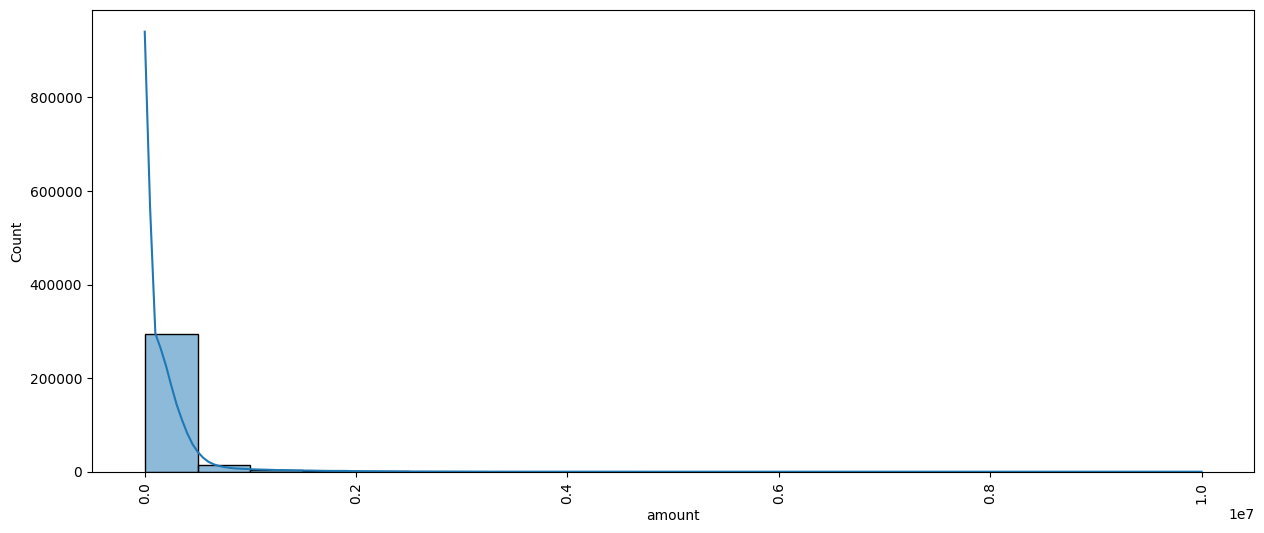

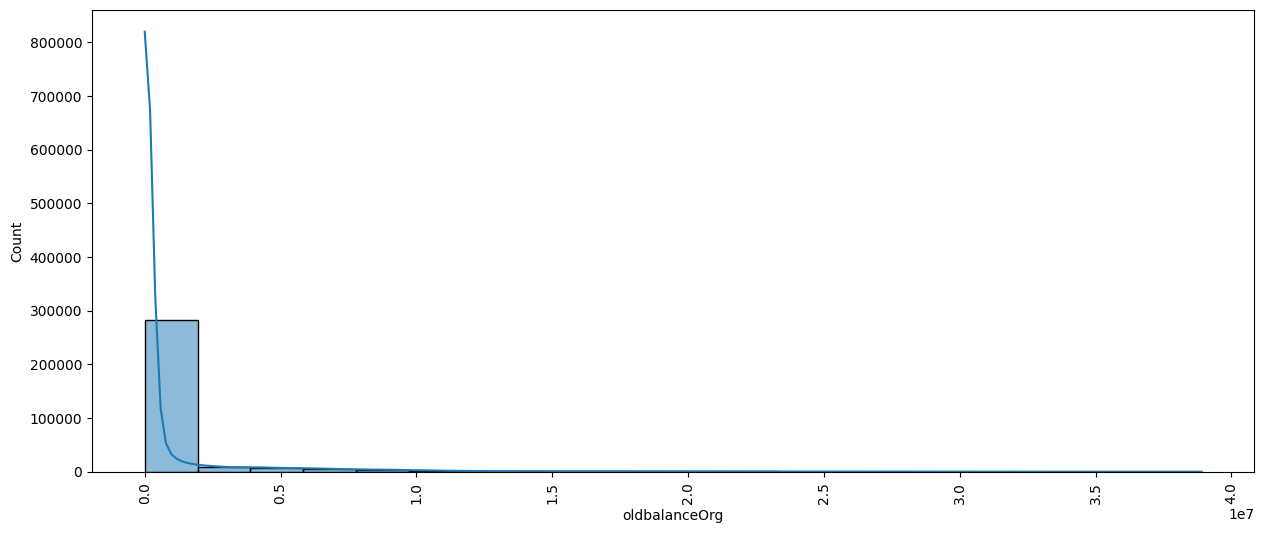

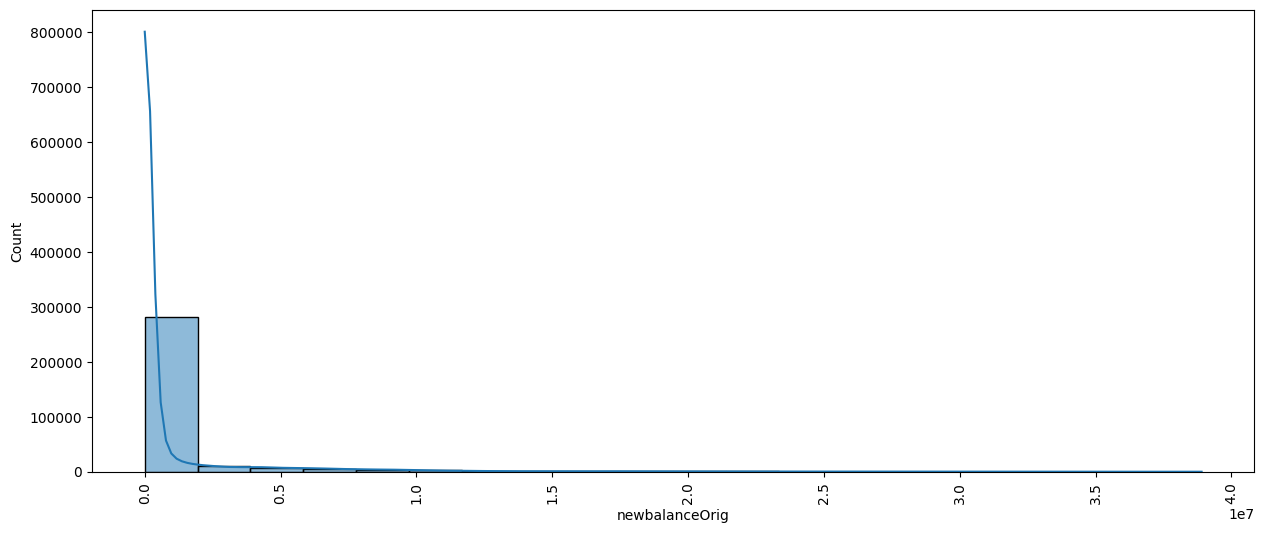

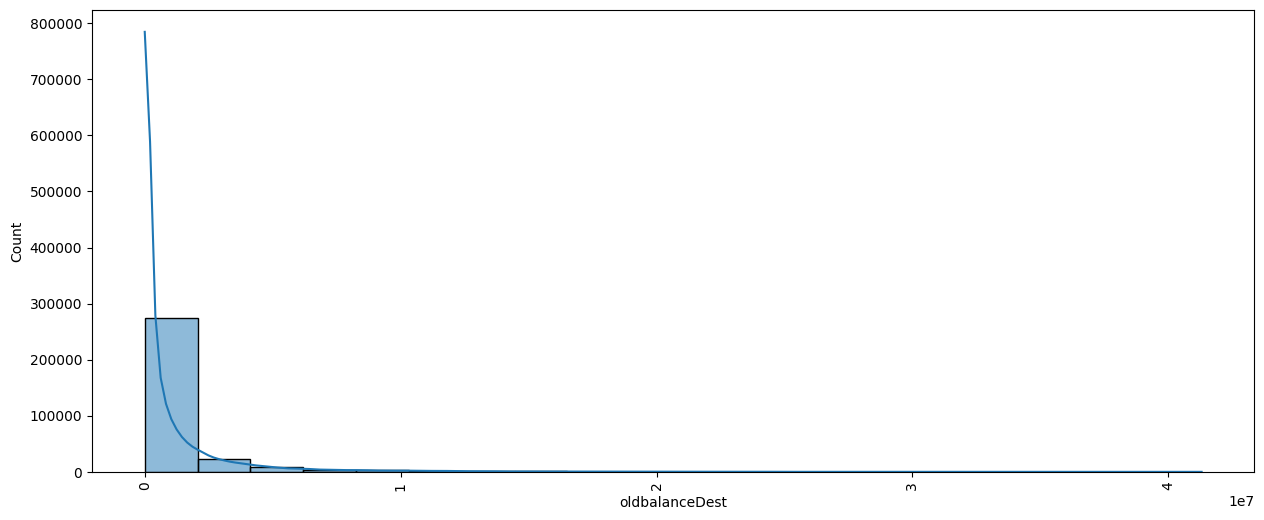

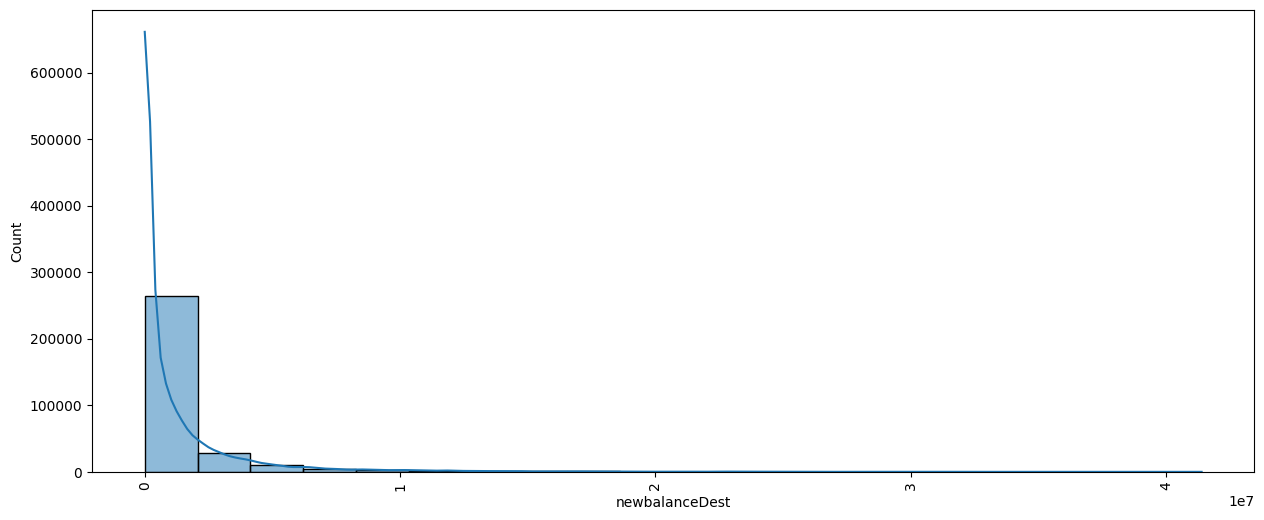

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

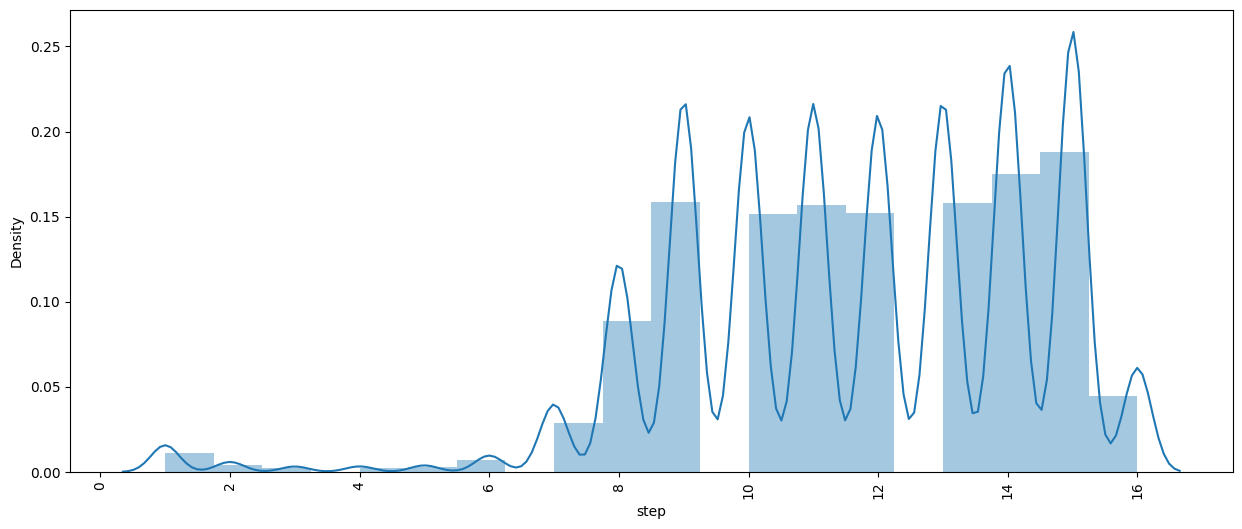

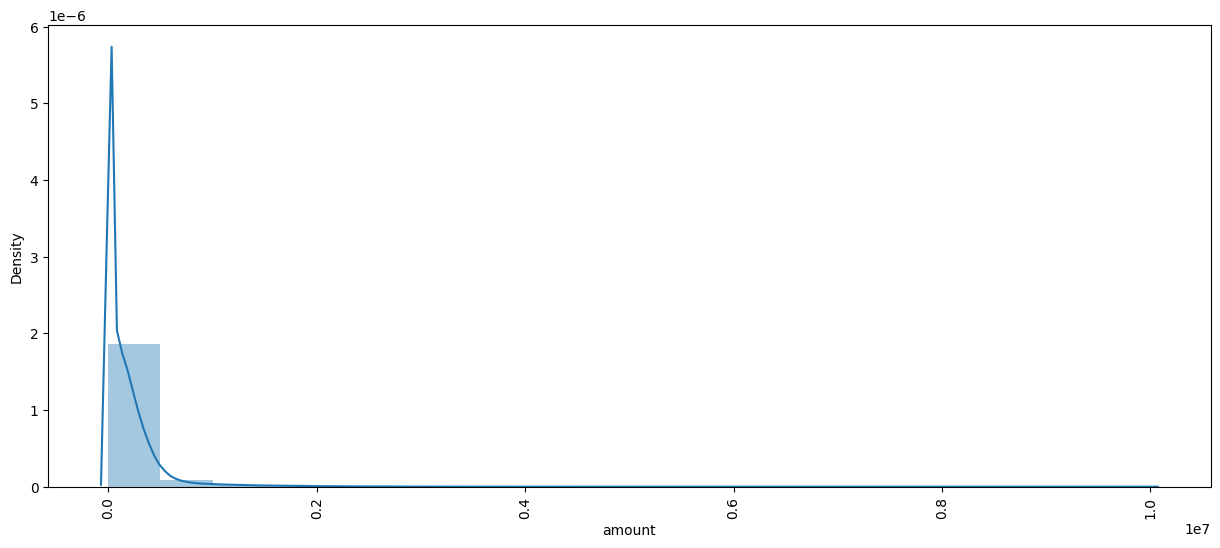

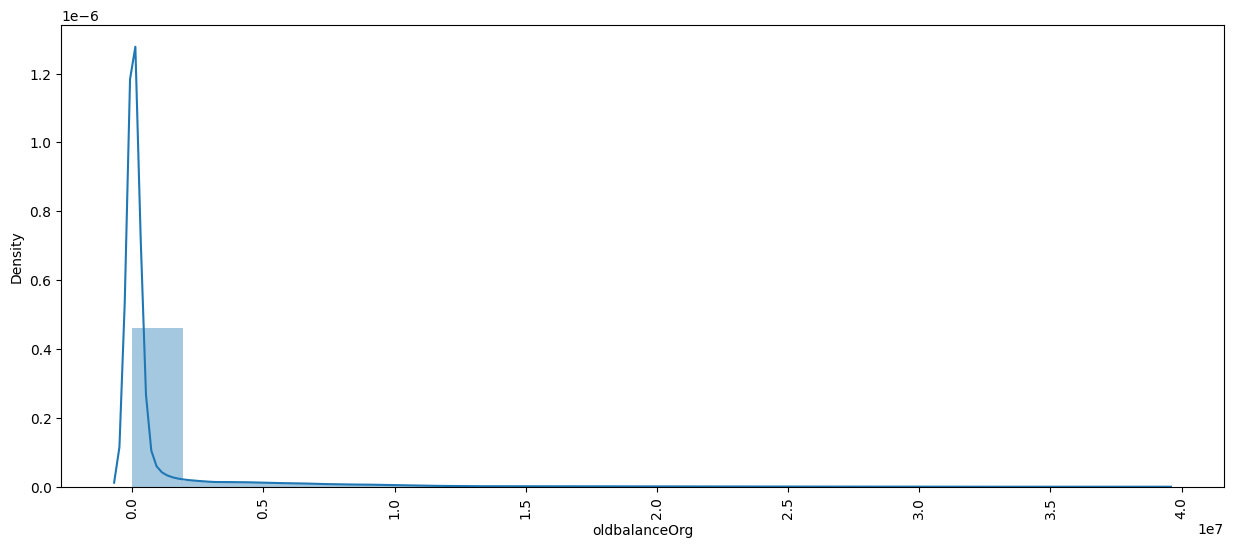

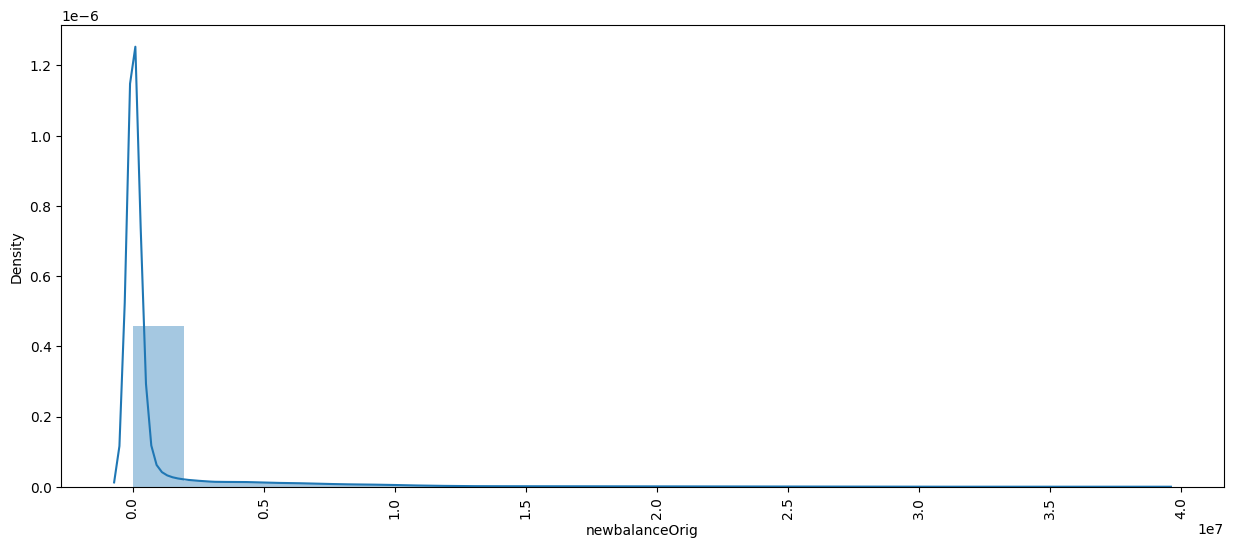

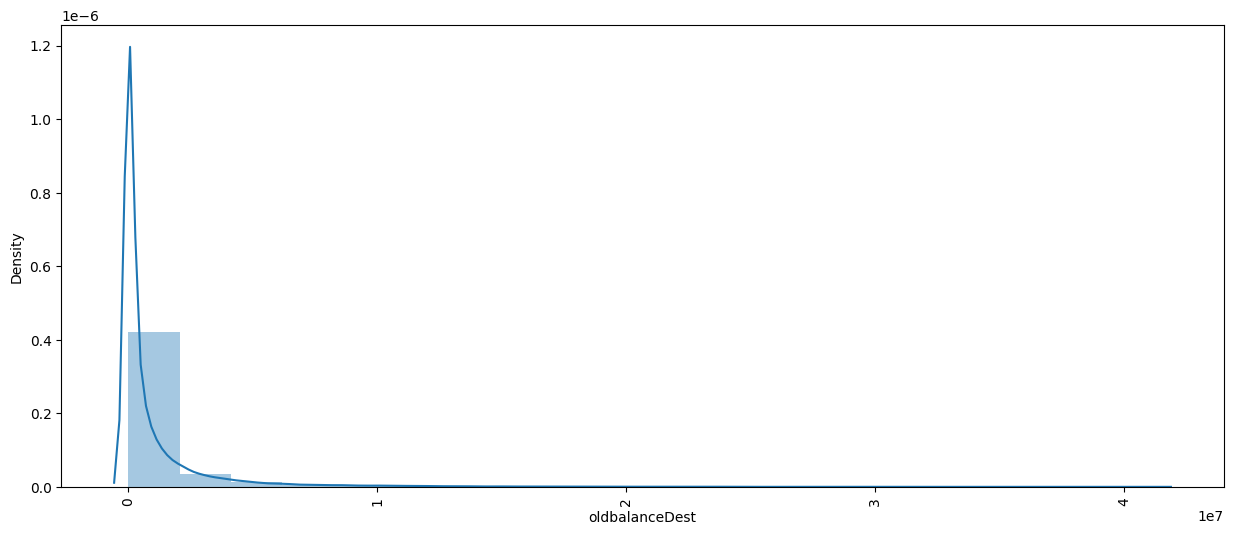

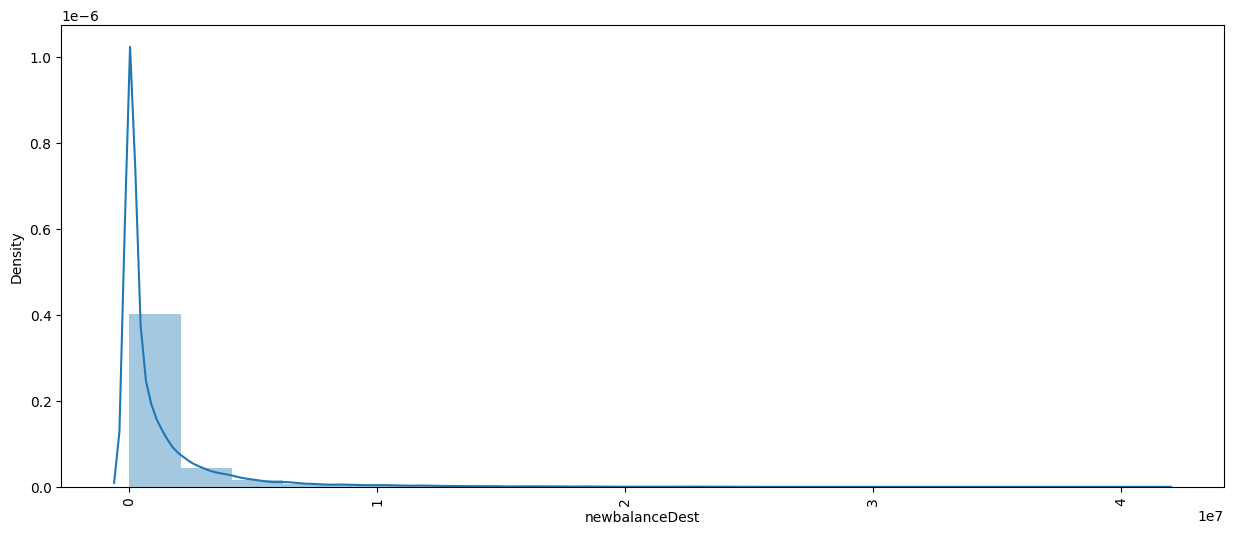

In [ ]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

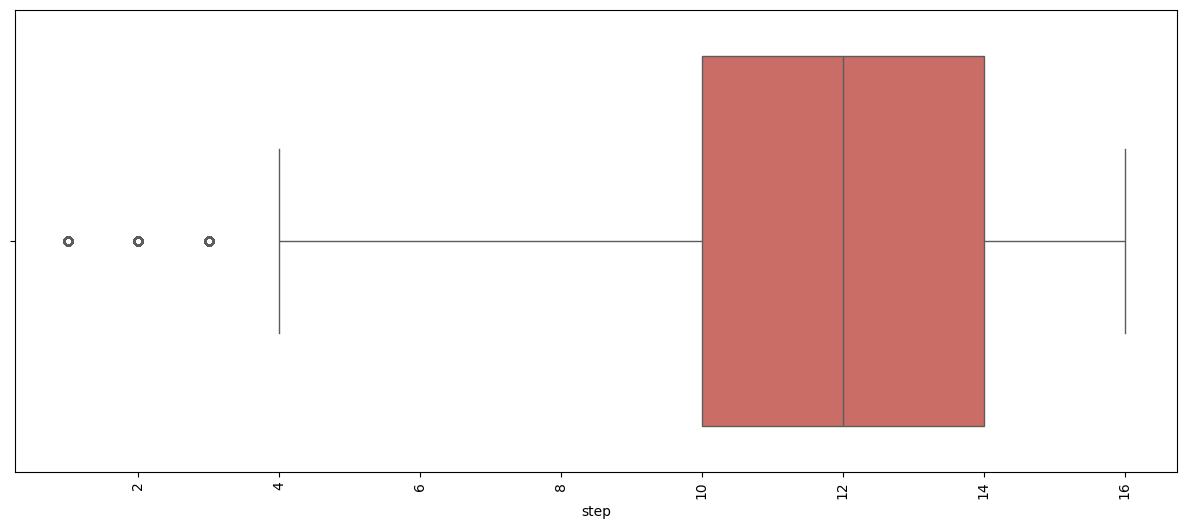

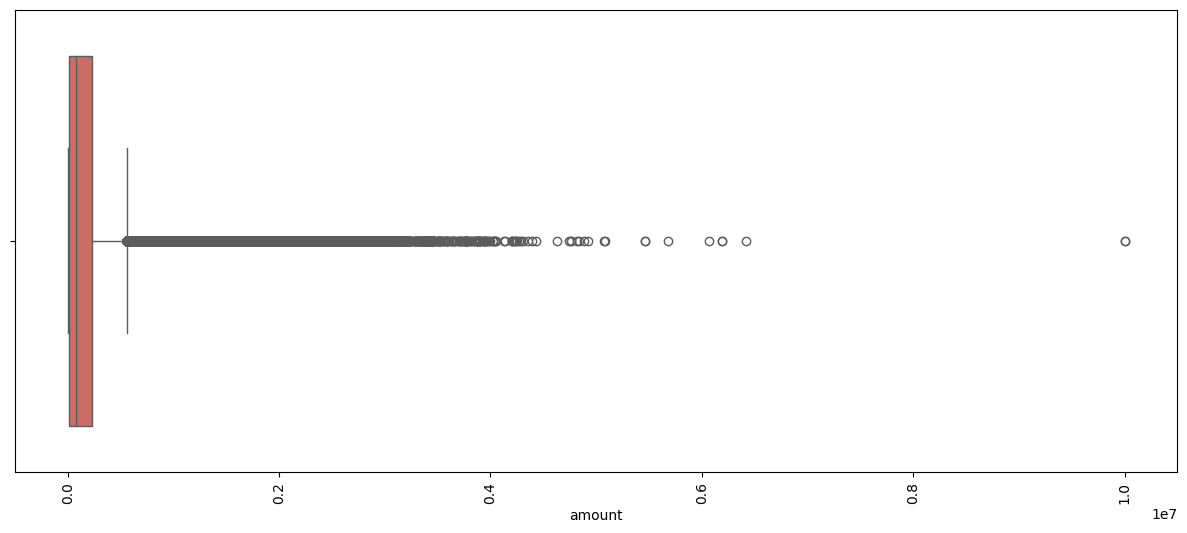

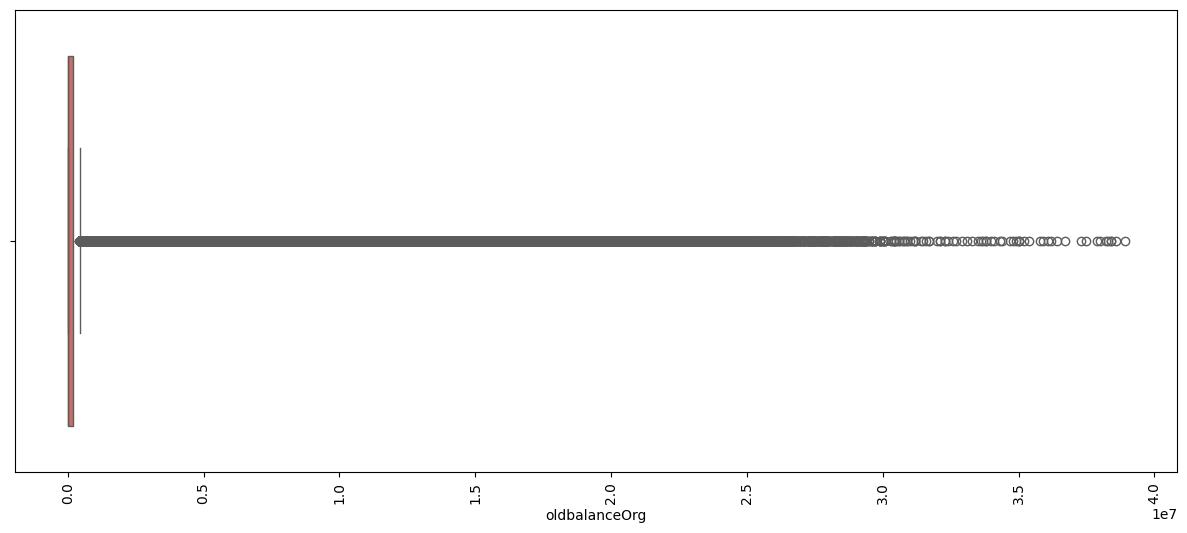

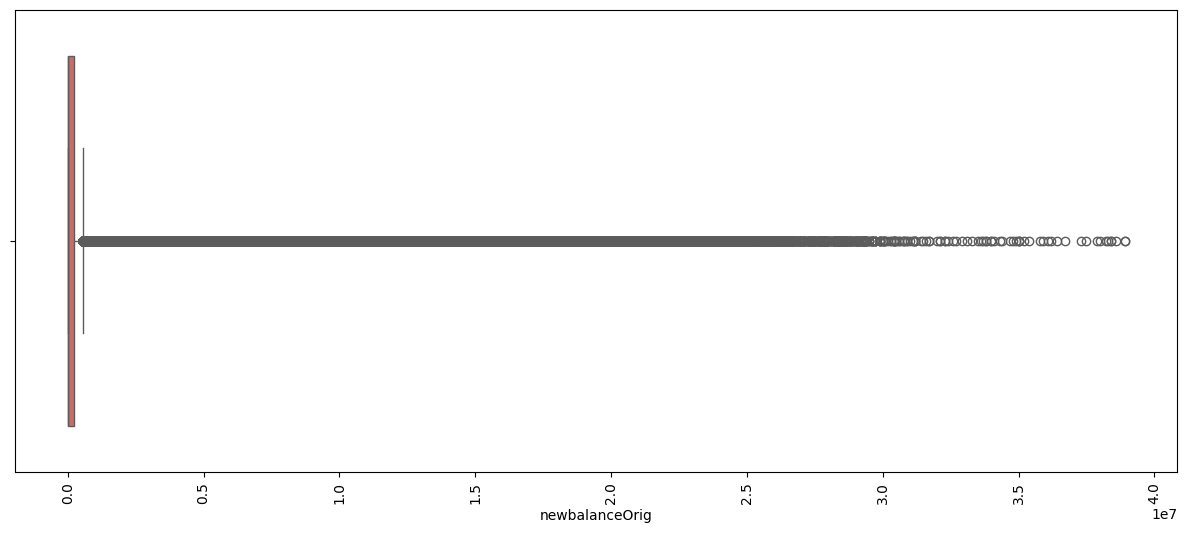

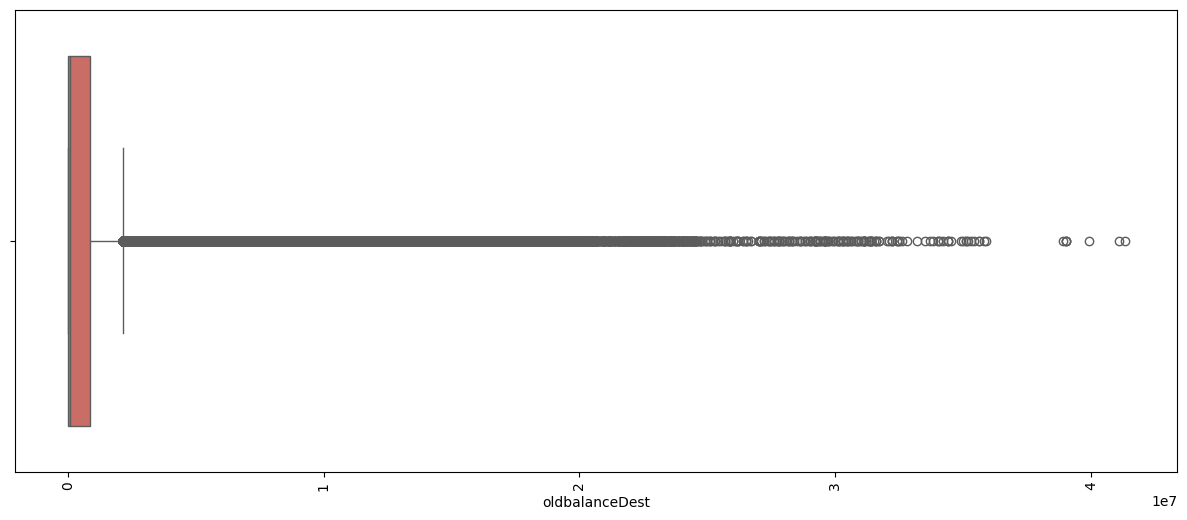

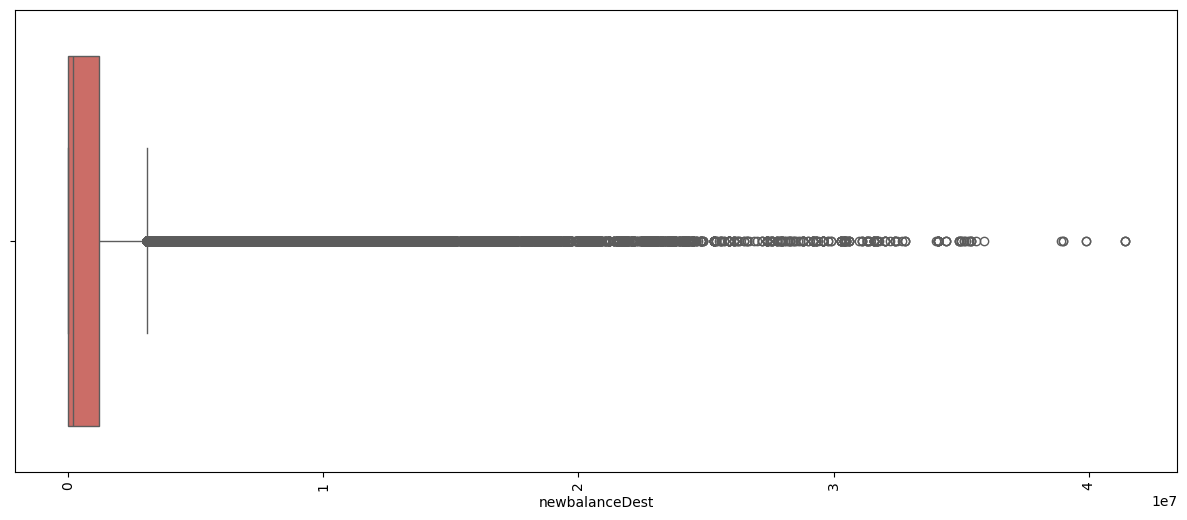

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

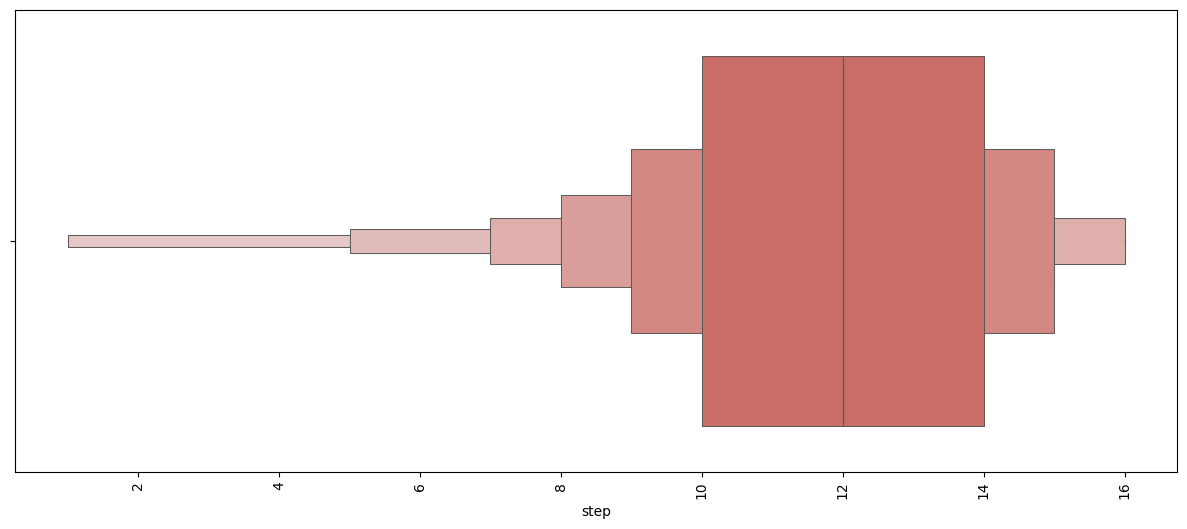

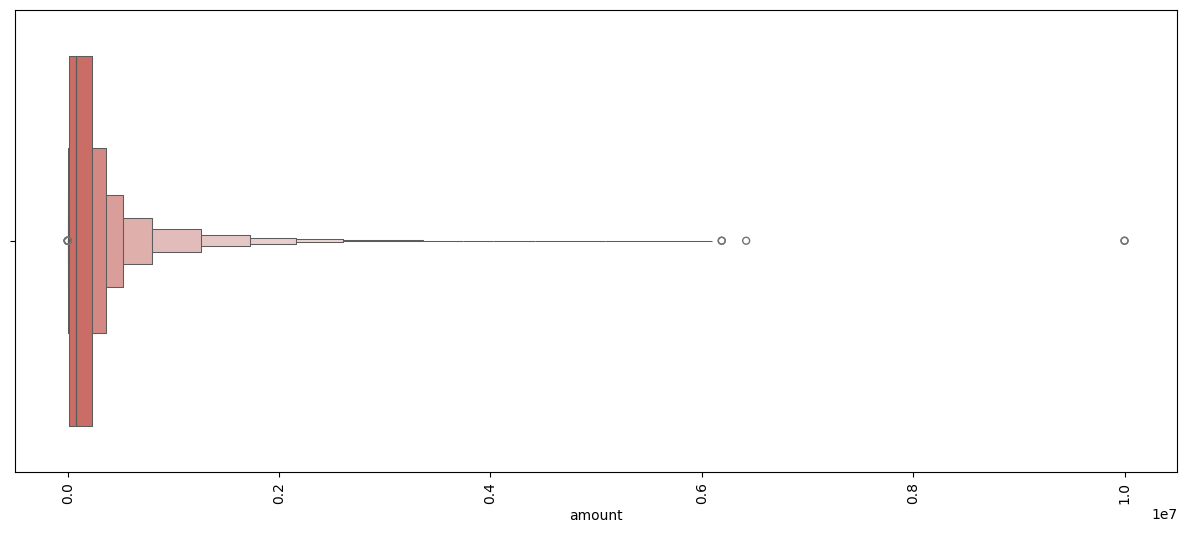

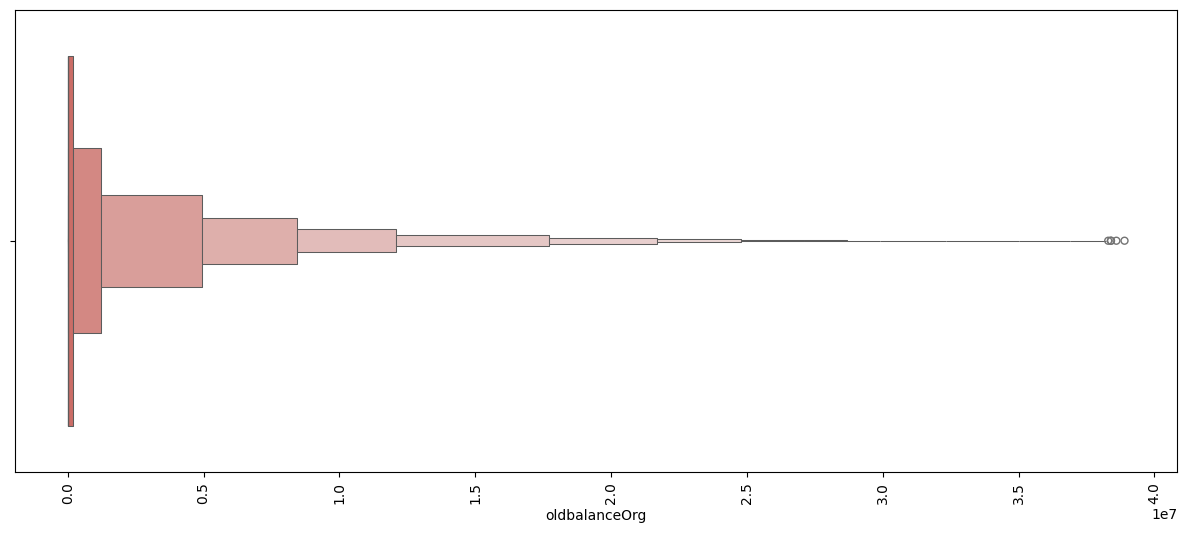

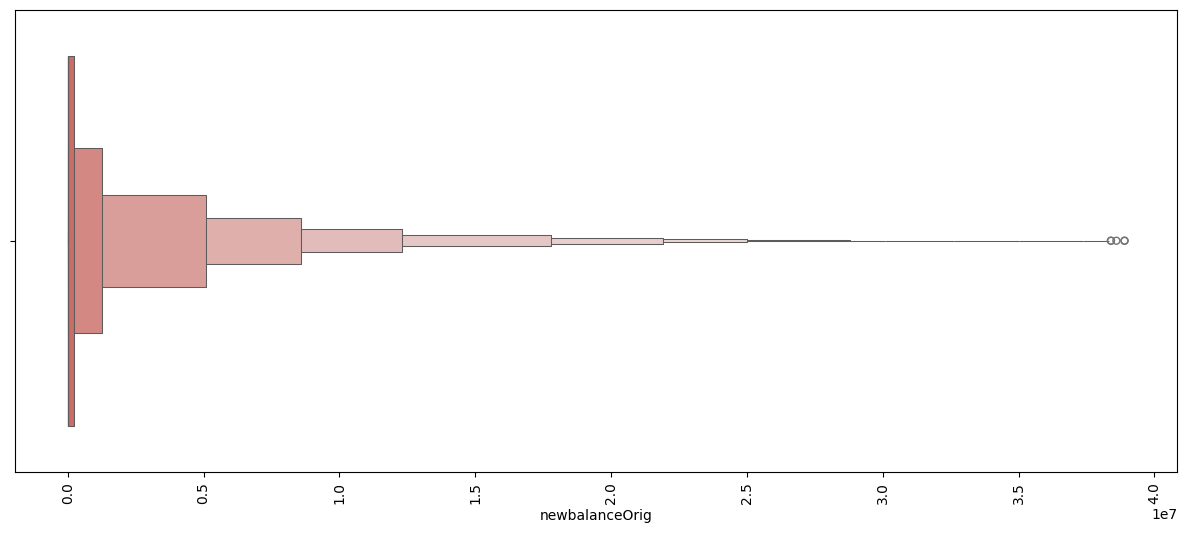

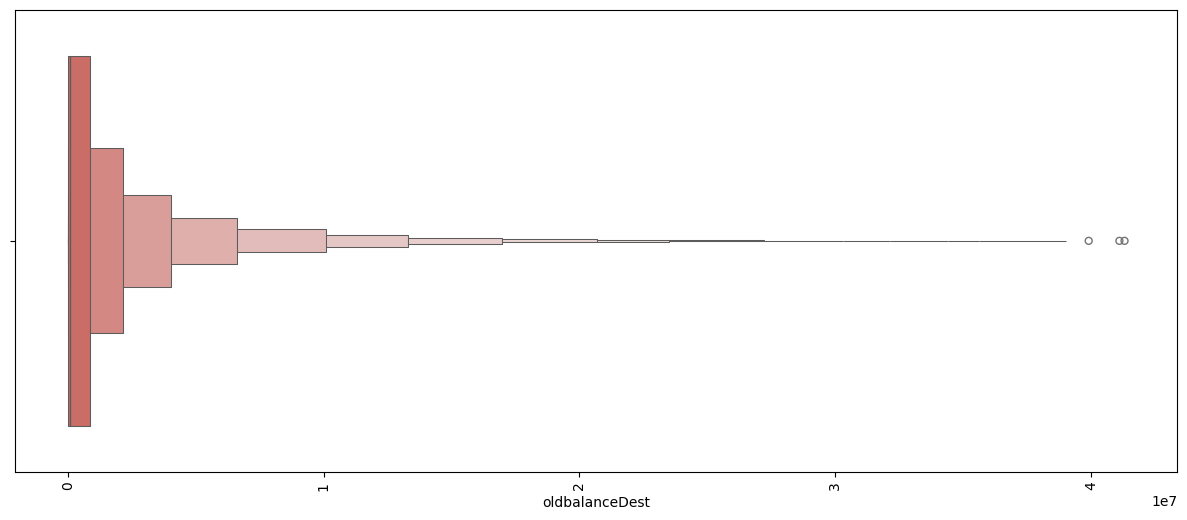

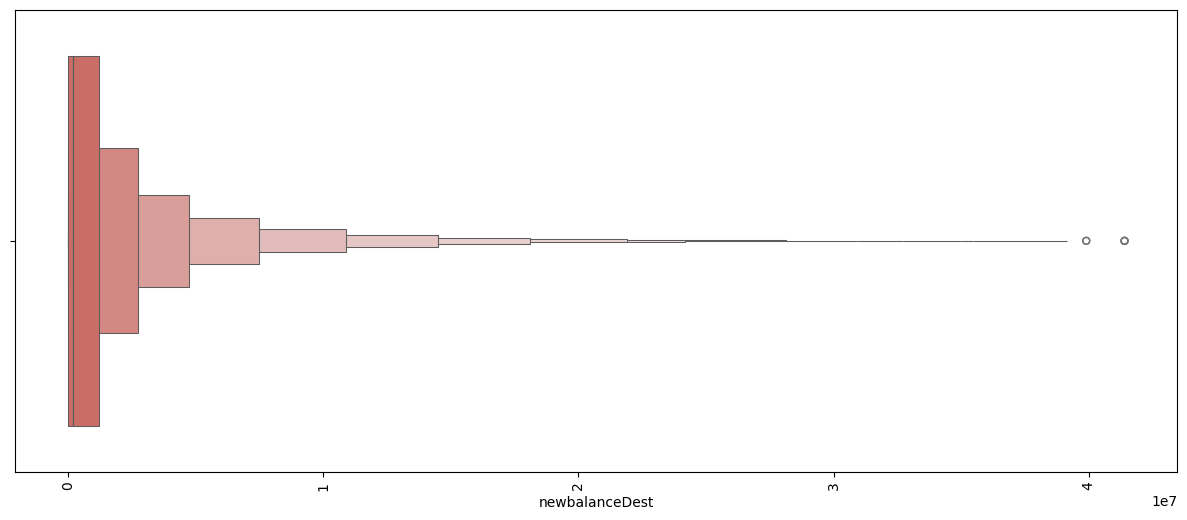

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

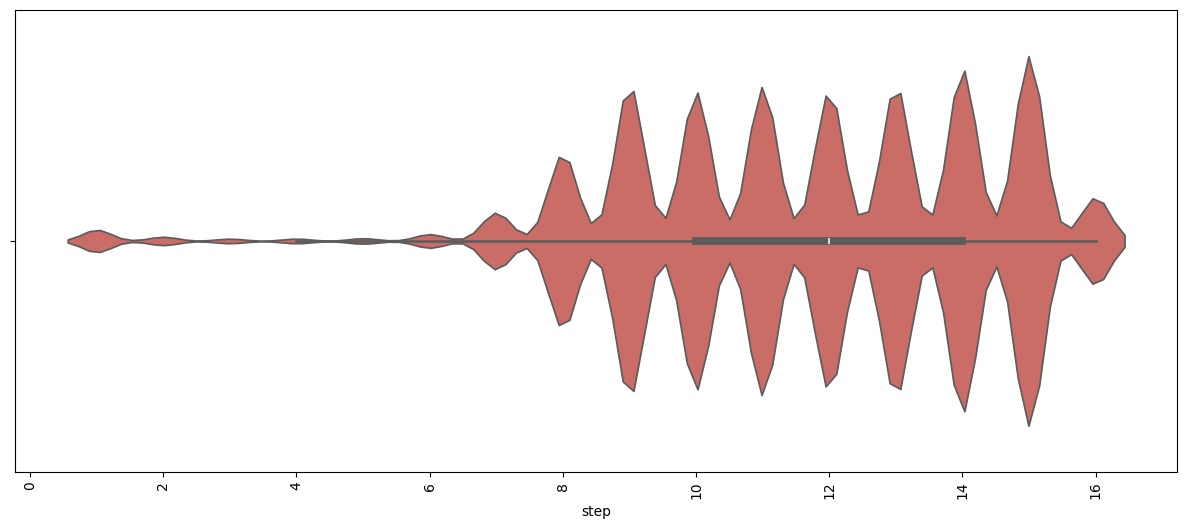

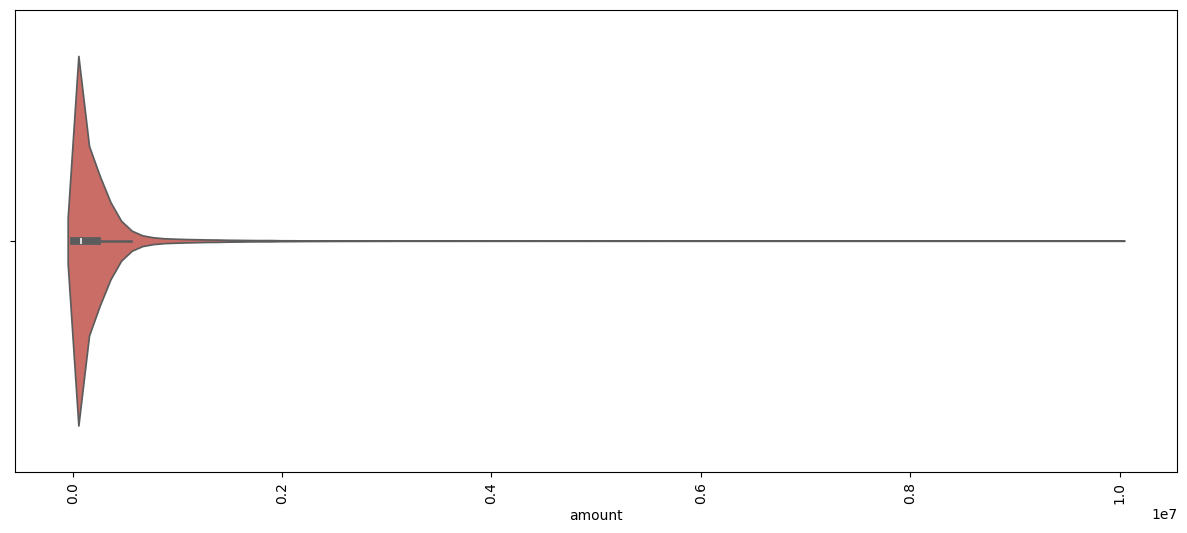

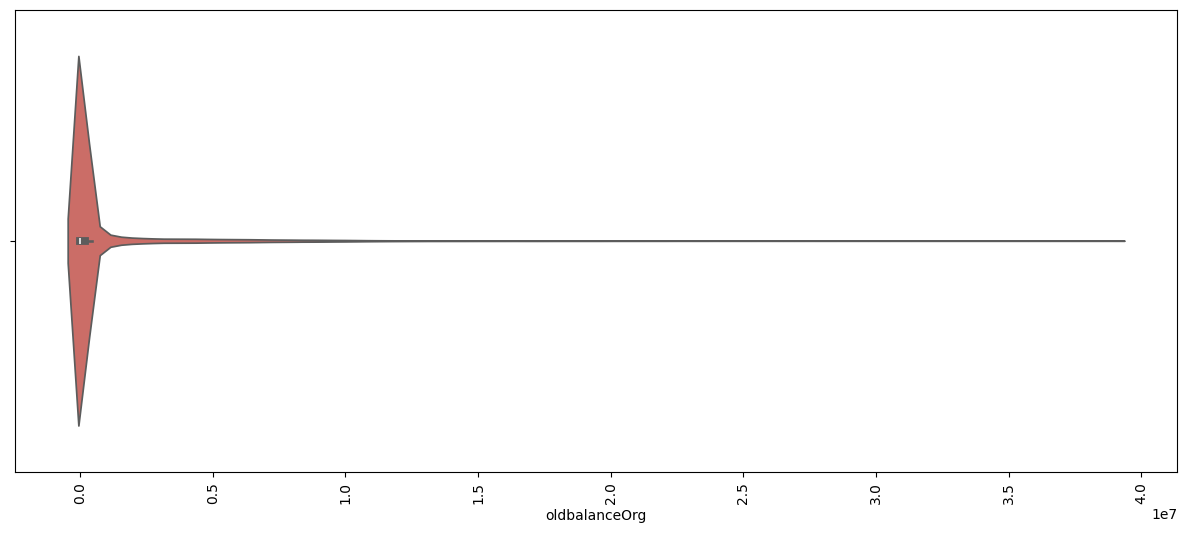

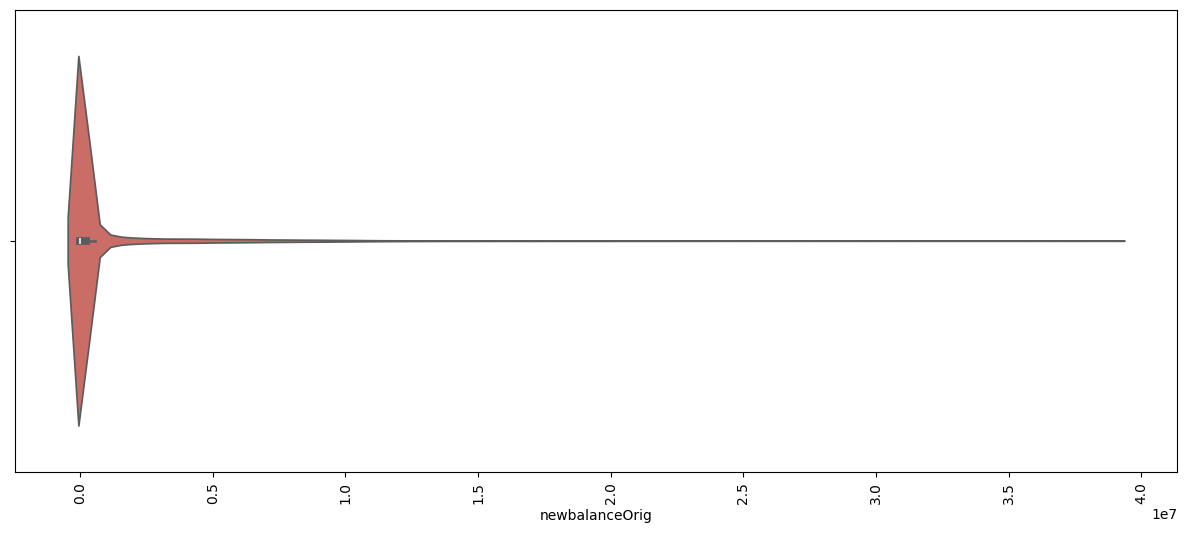

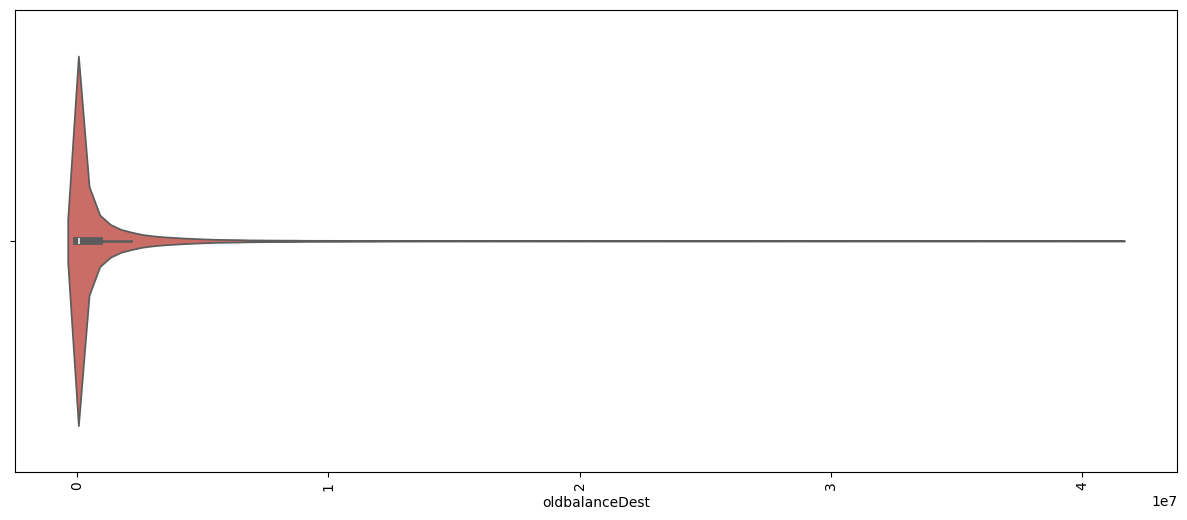

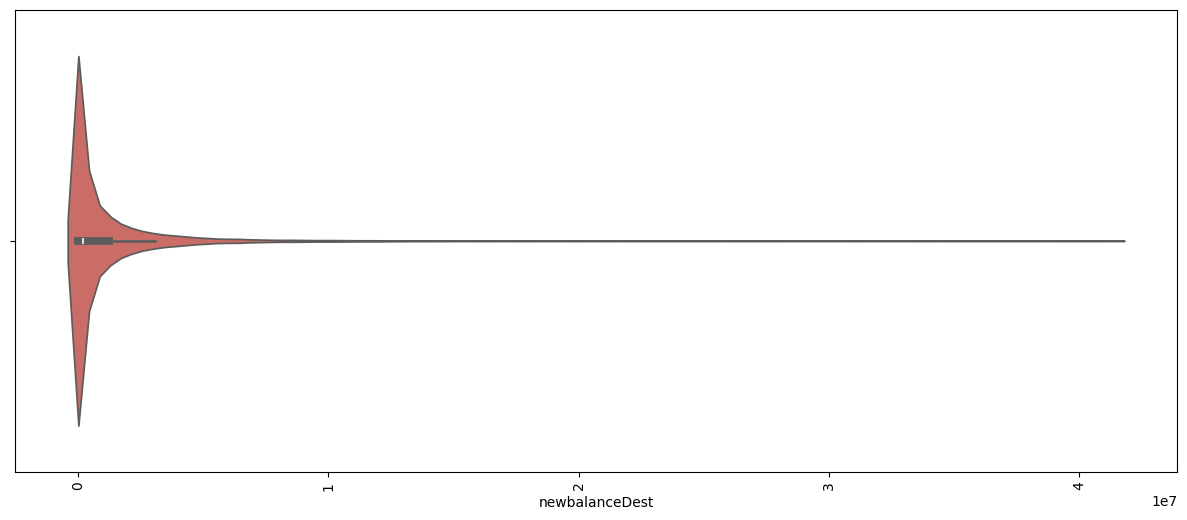

In [ ]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

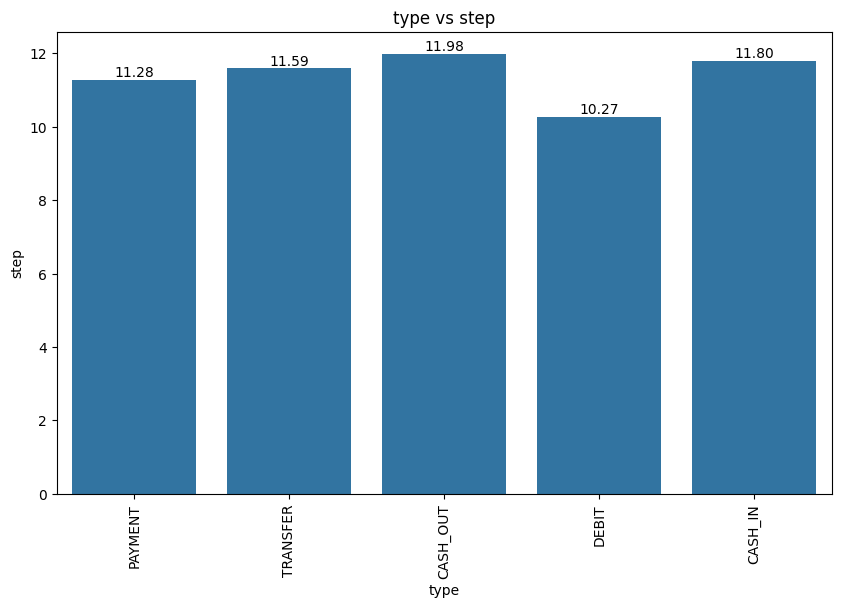

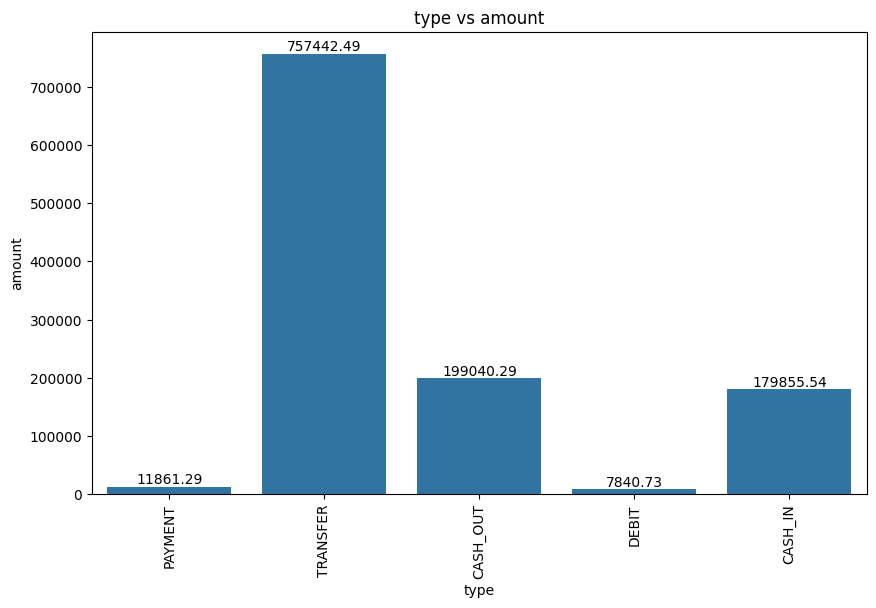

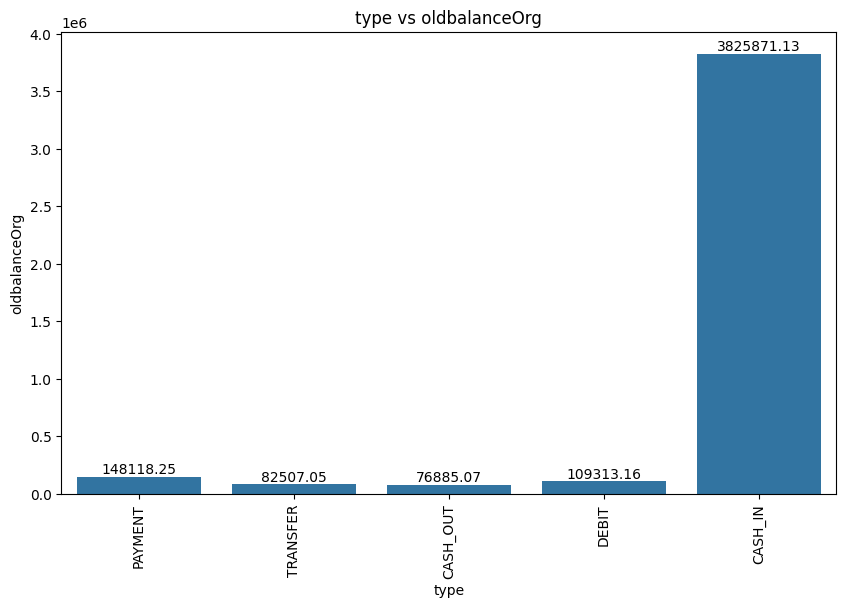

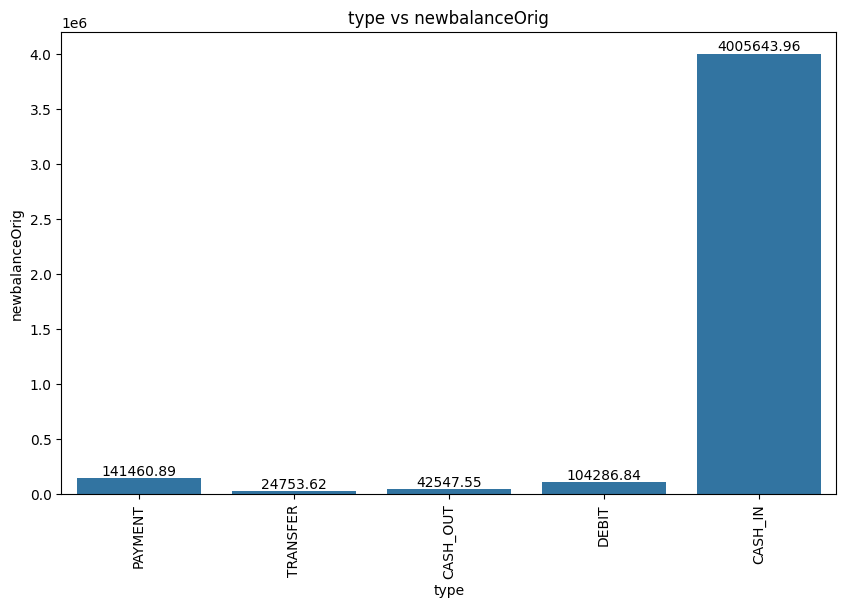

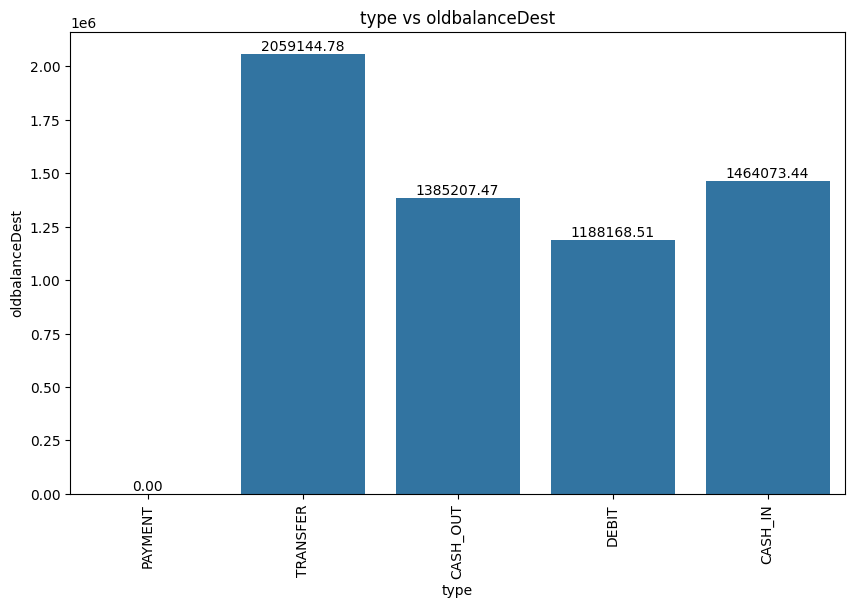

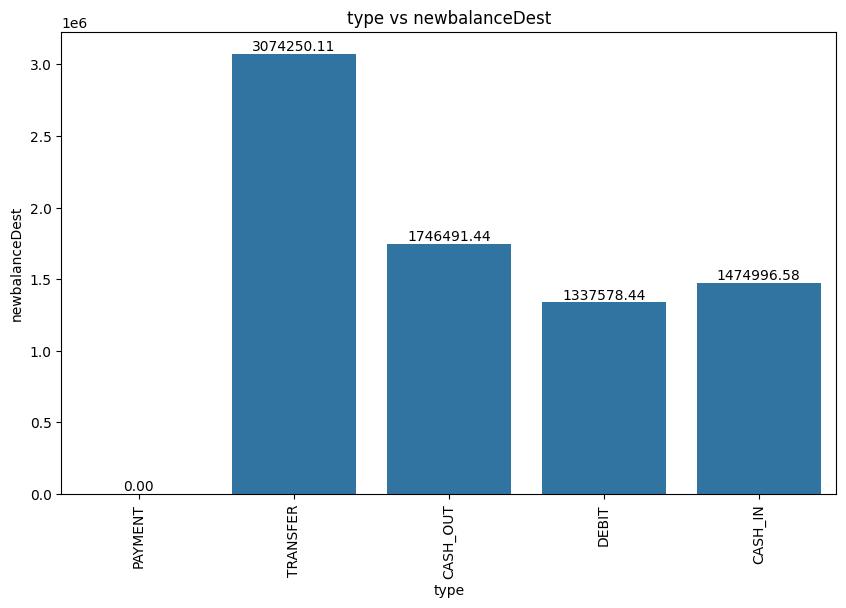

In [ ]:
for cat in categorical:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

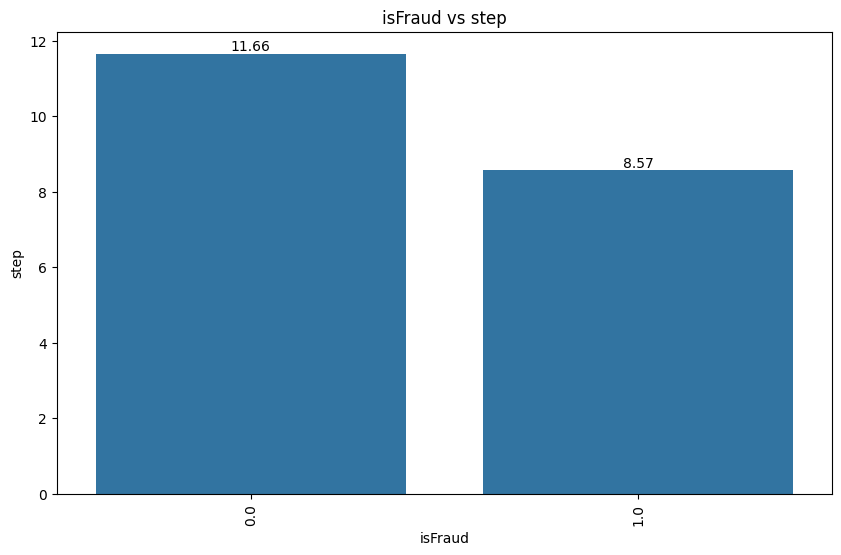

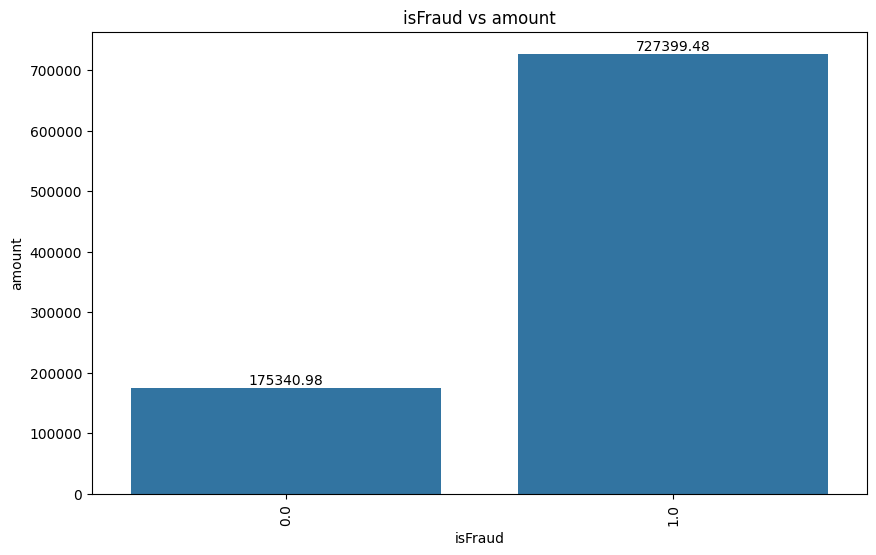

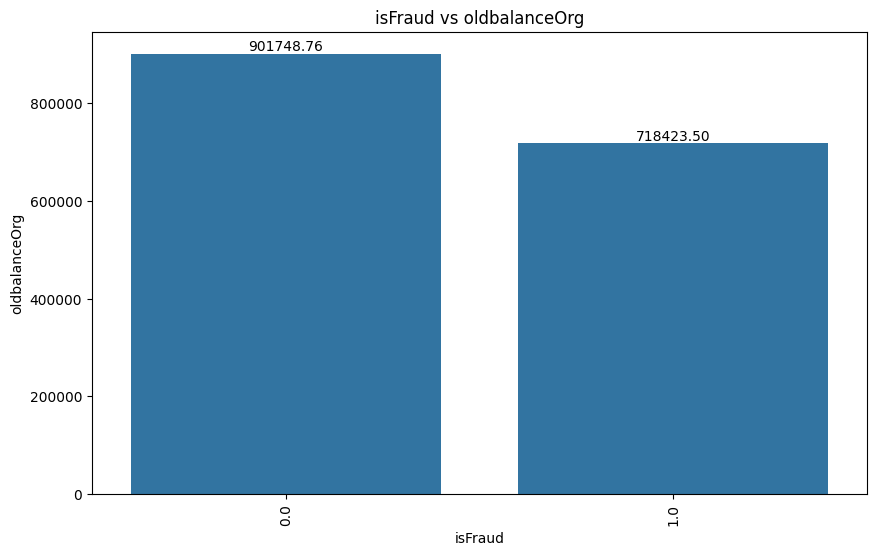

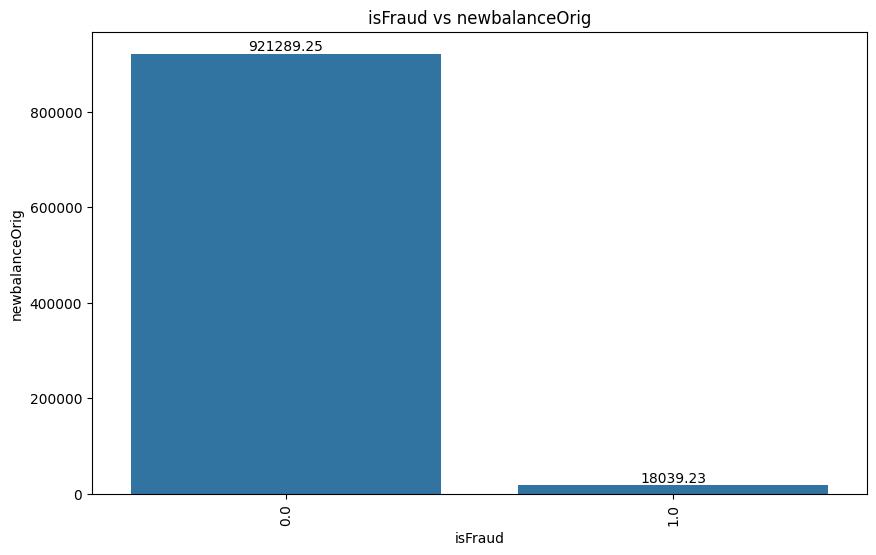

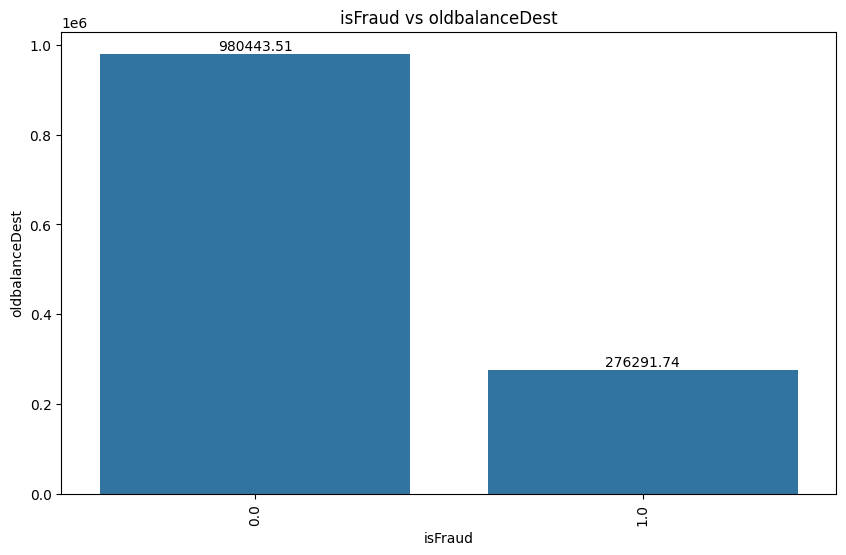

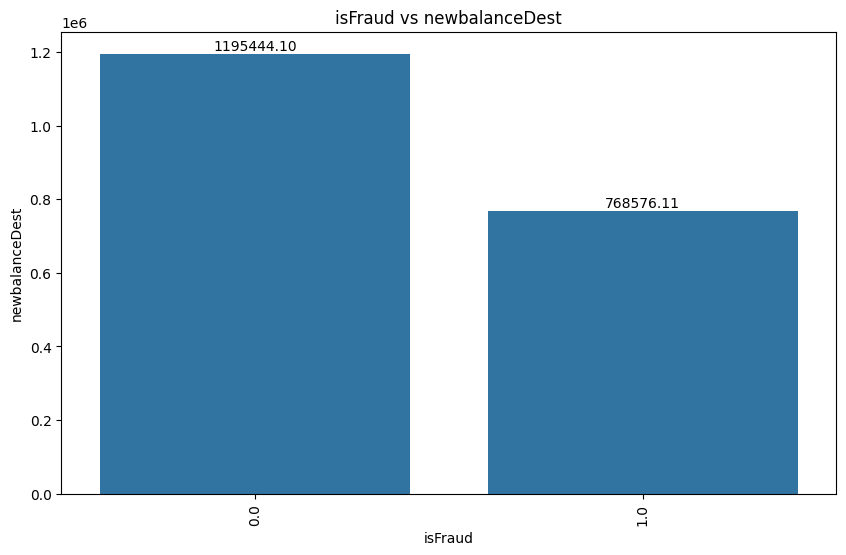

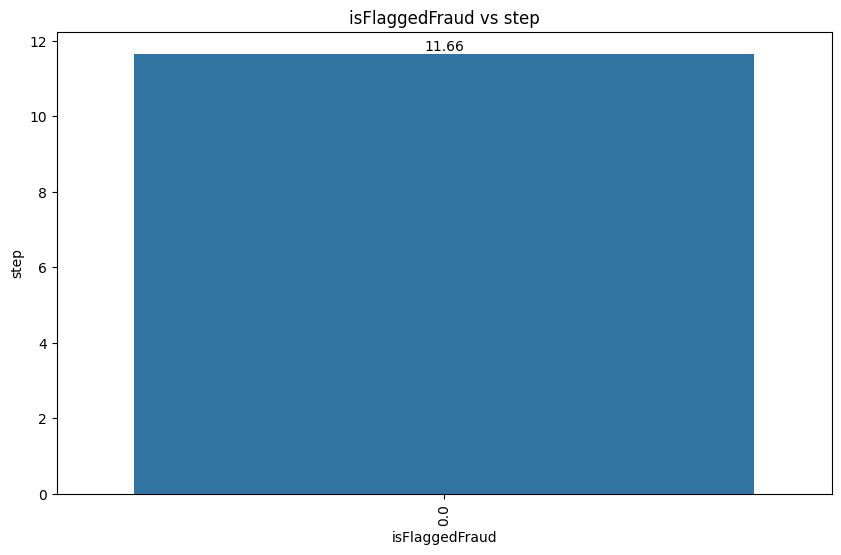

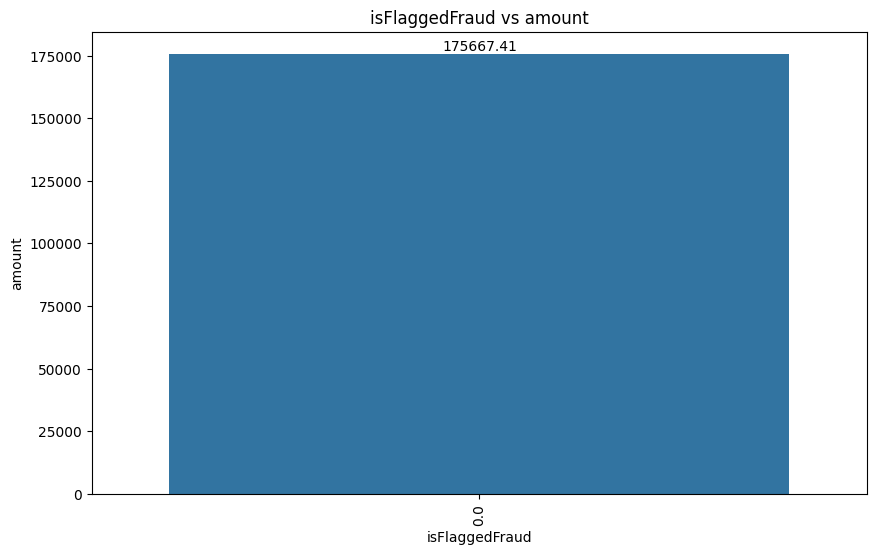

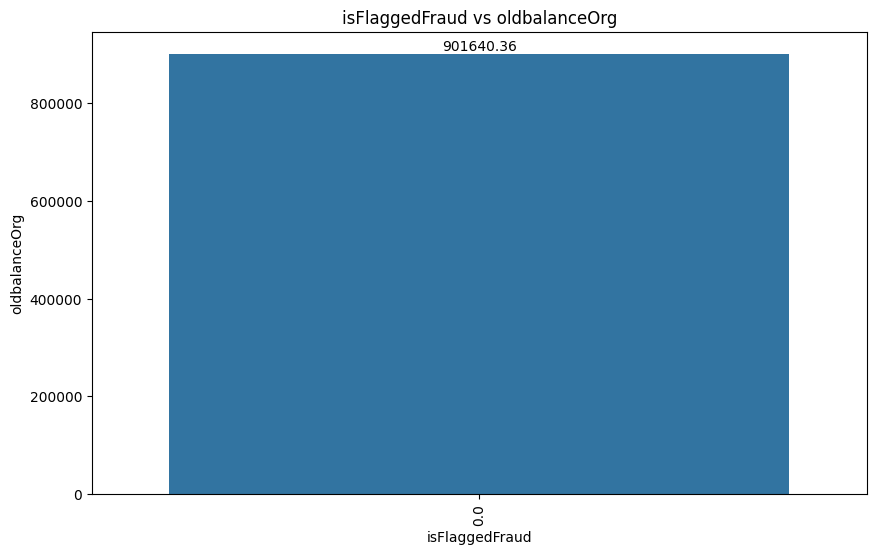

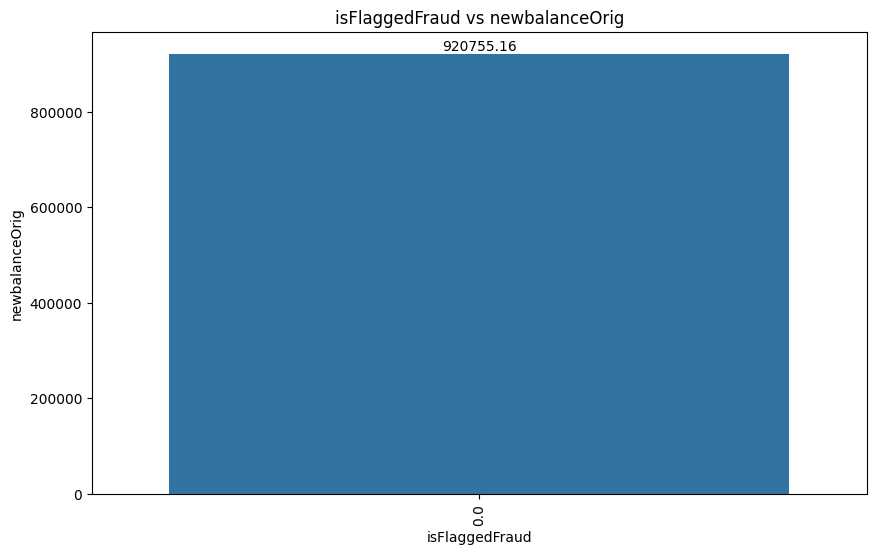

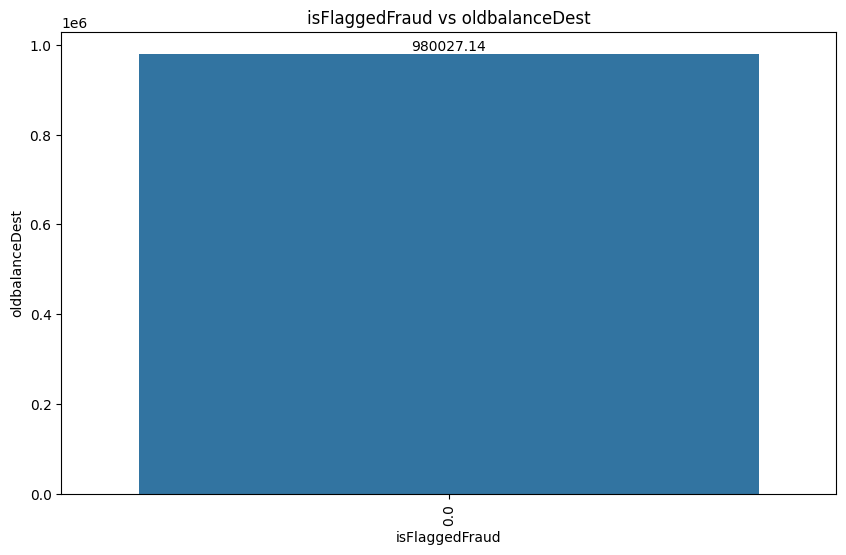

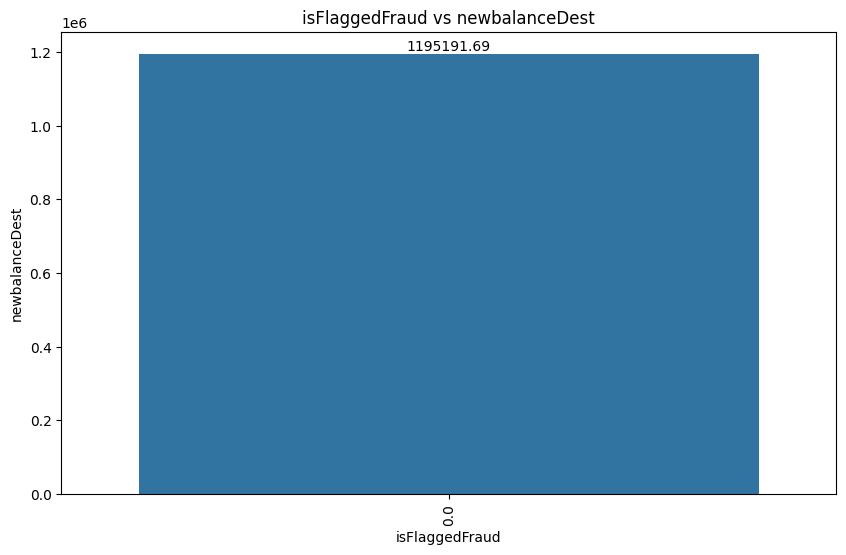

In [ ]:
for cat in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=cat, y=cont, ci=None)
        plt.title(f'{cat} vs {cont}')

        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

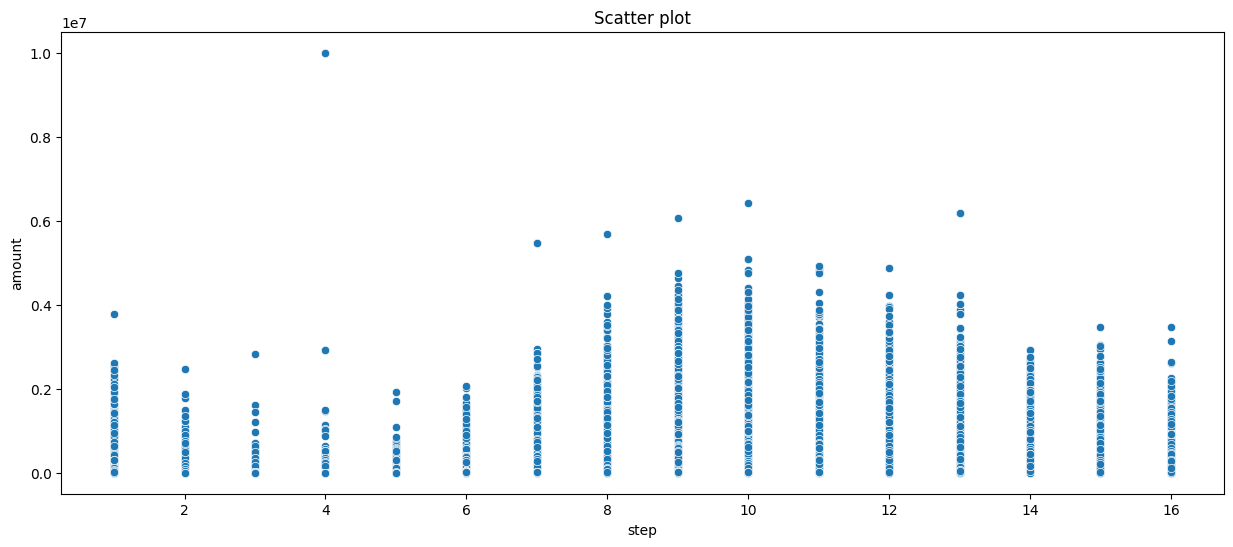

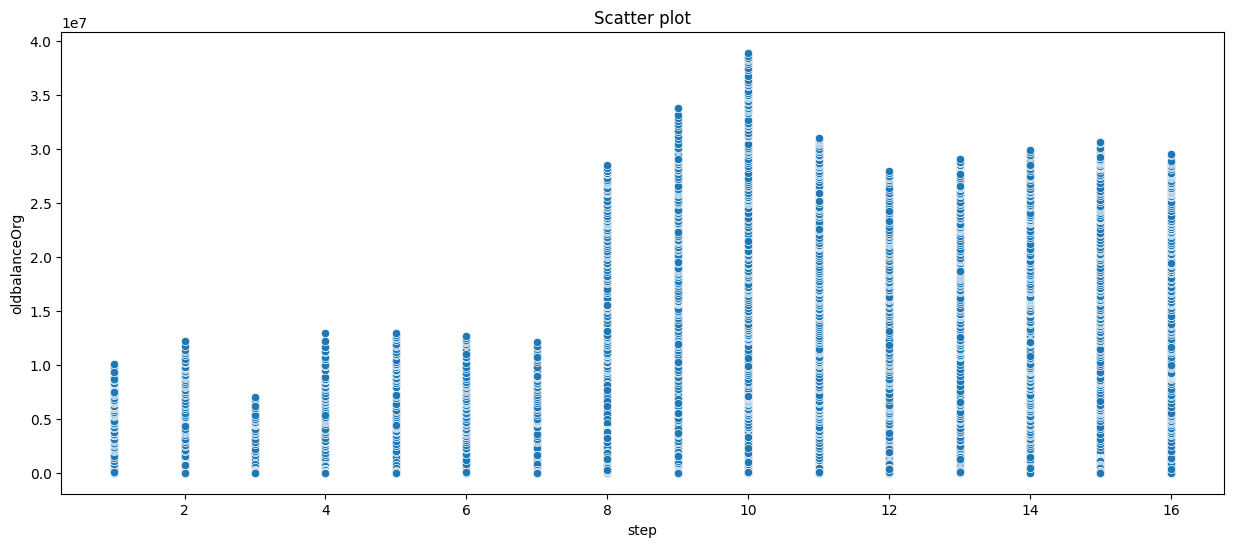

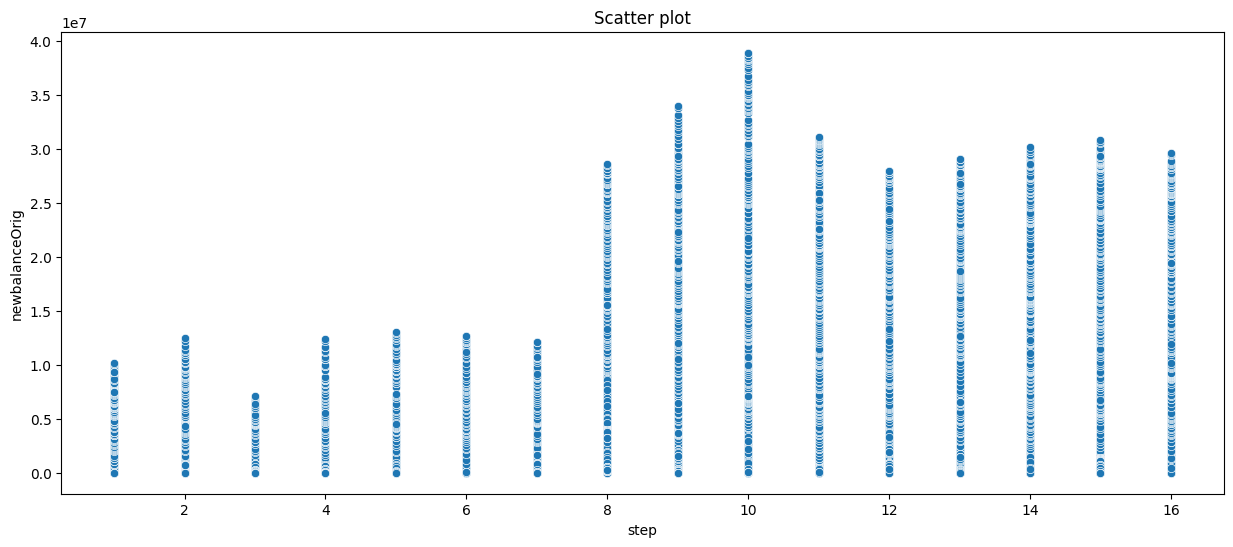

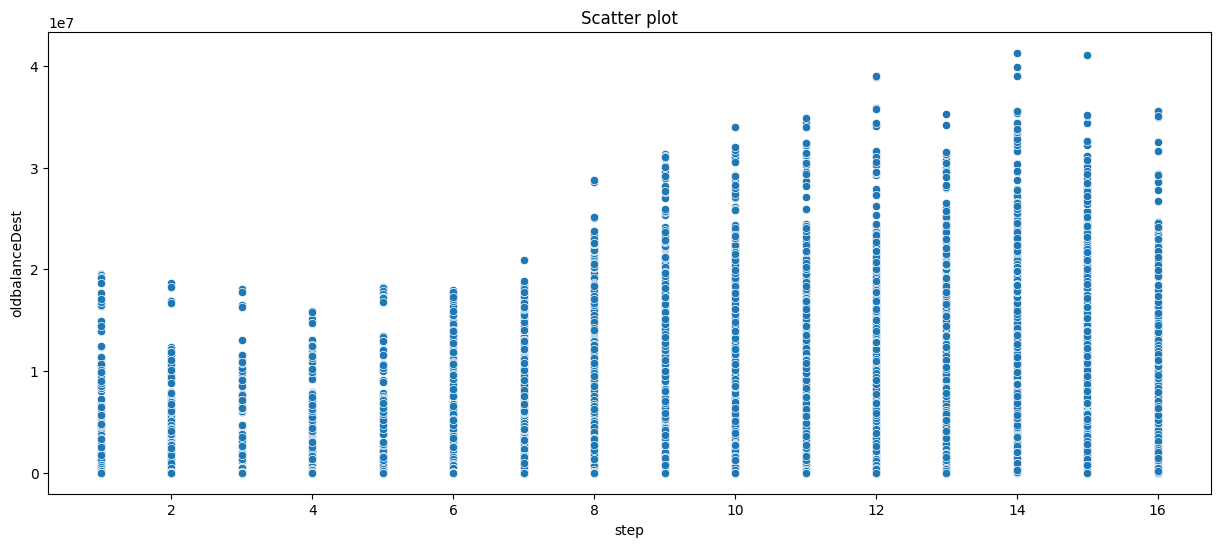

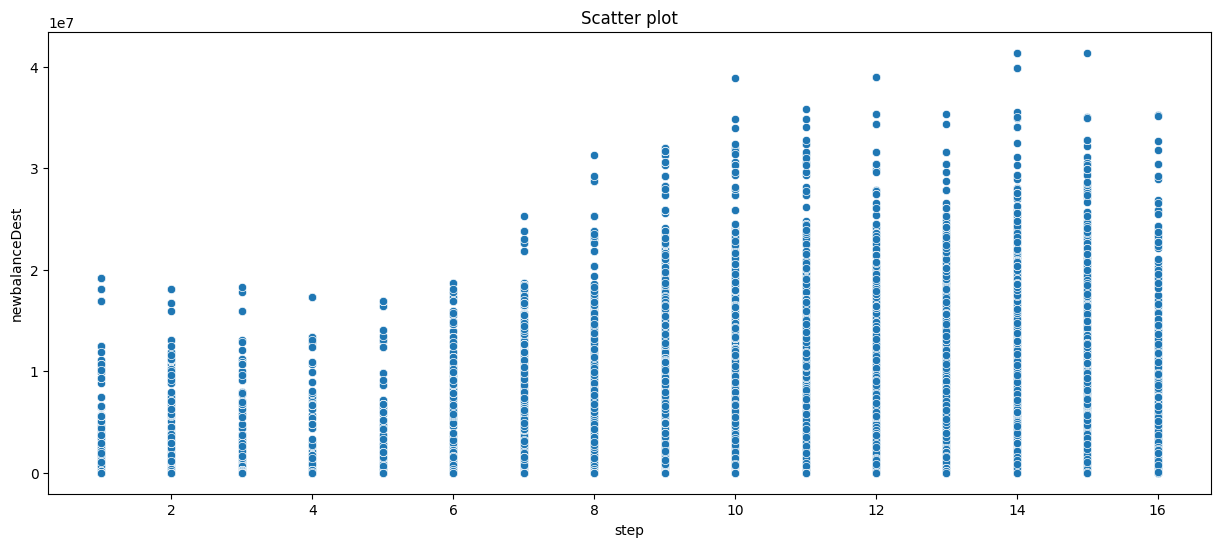

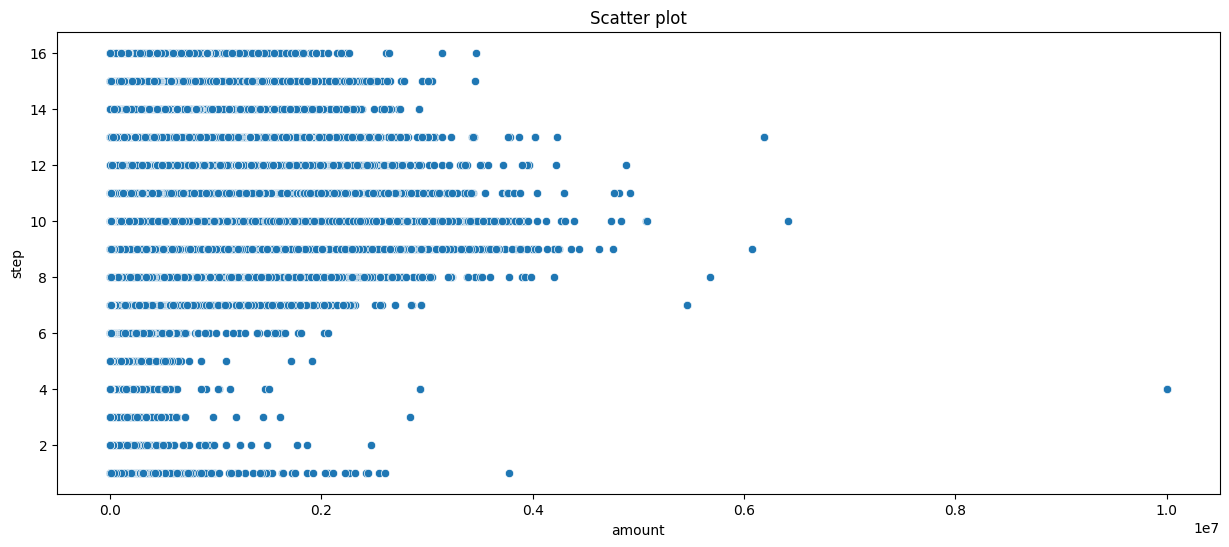

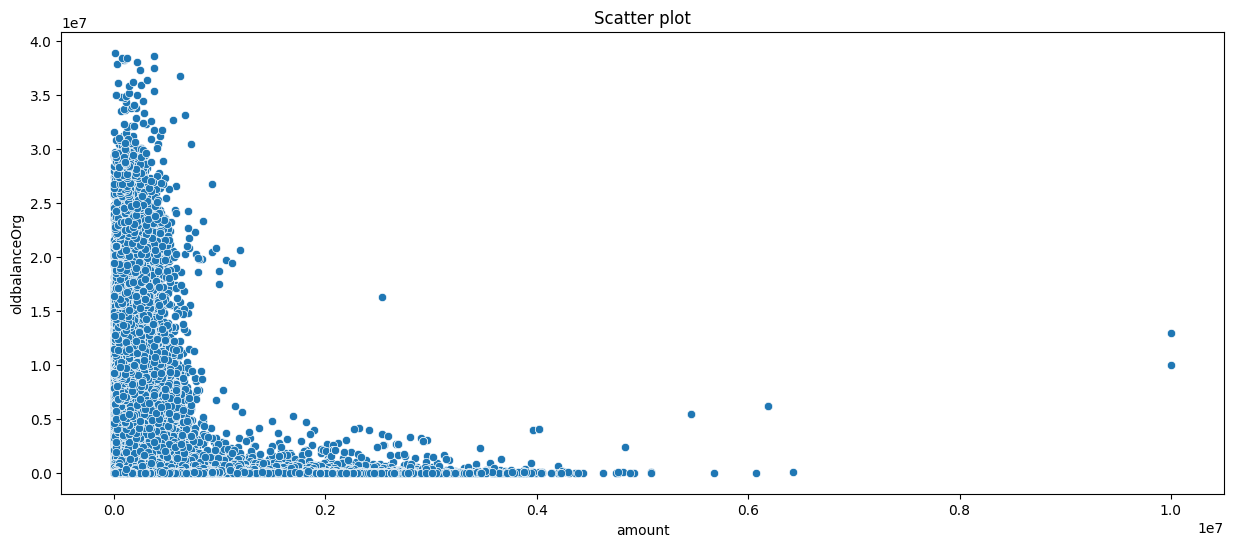

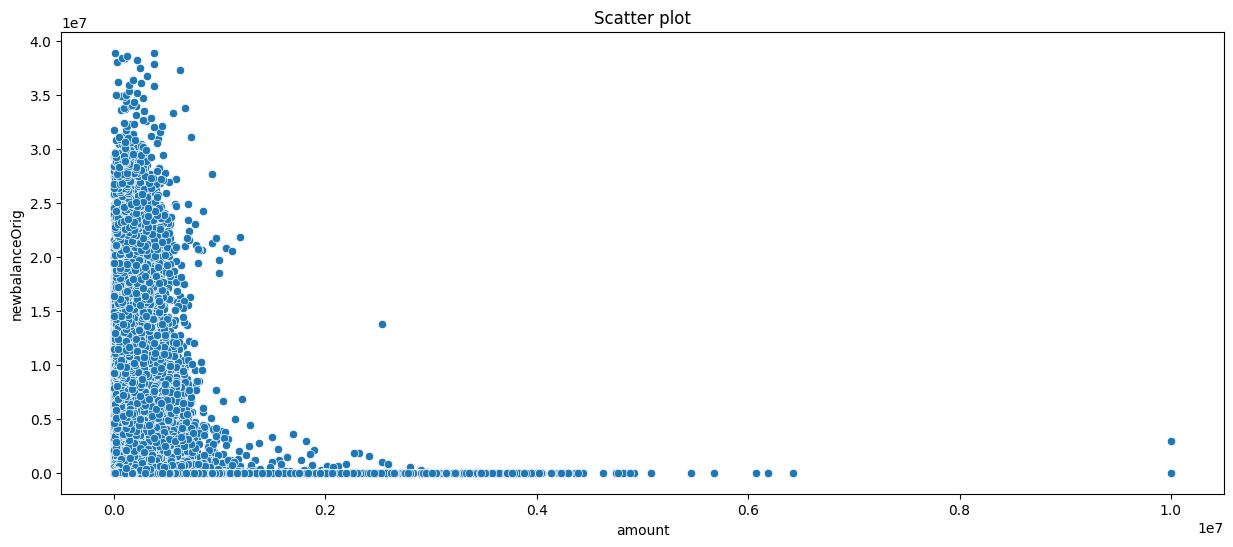

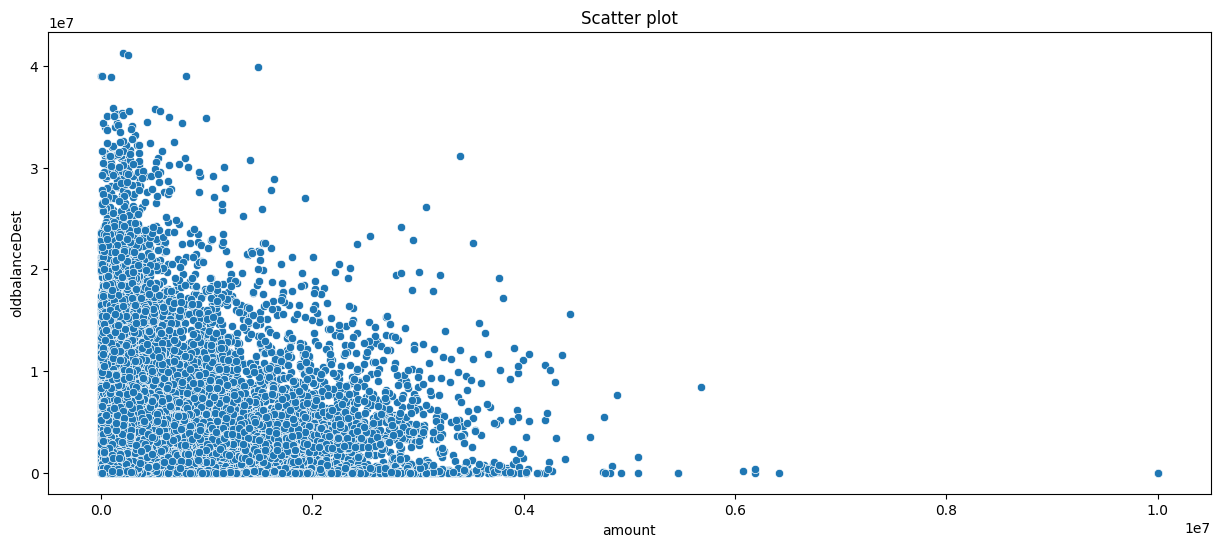

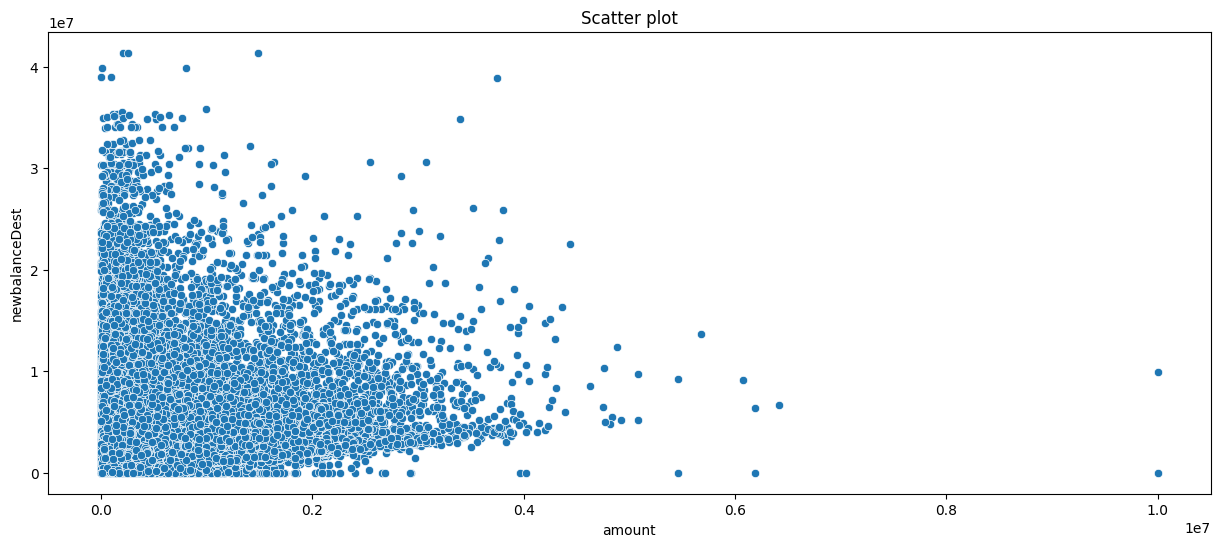

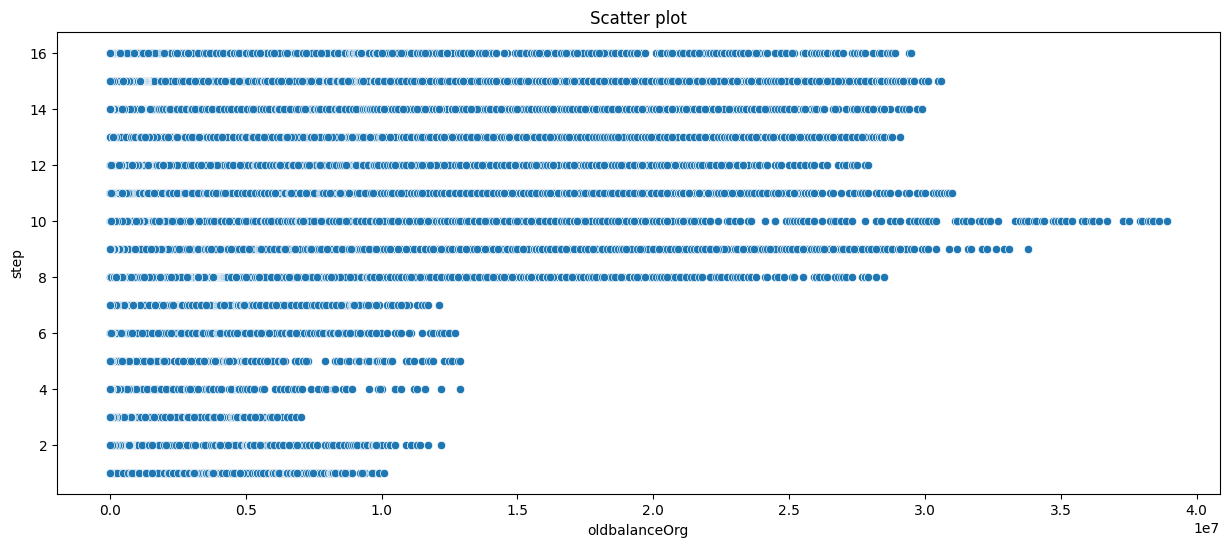

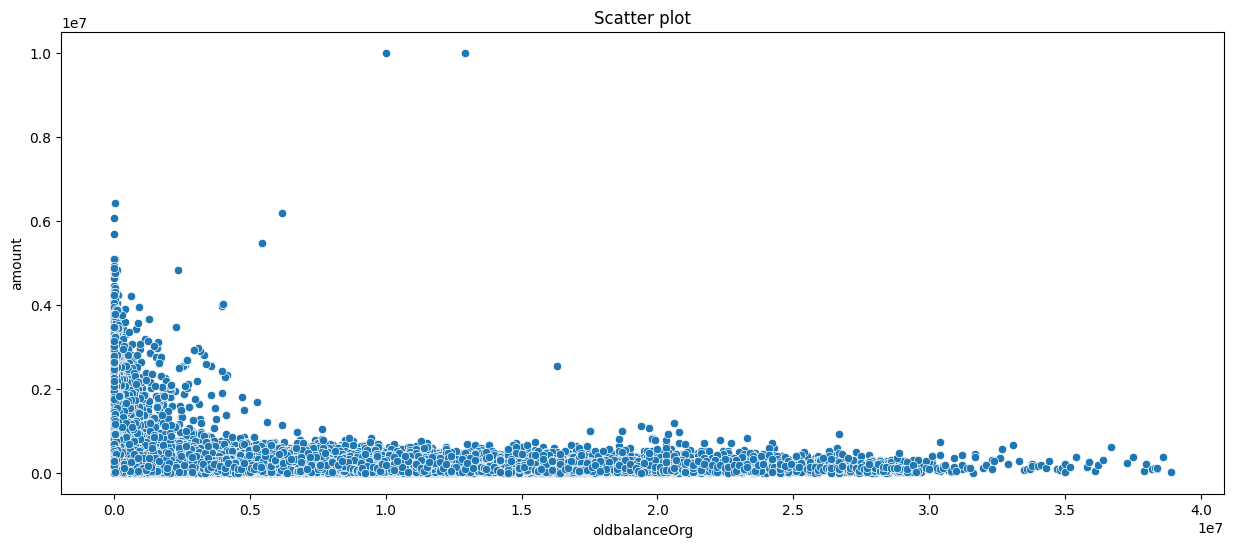

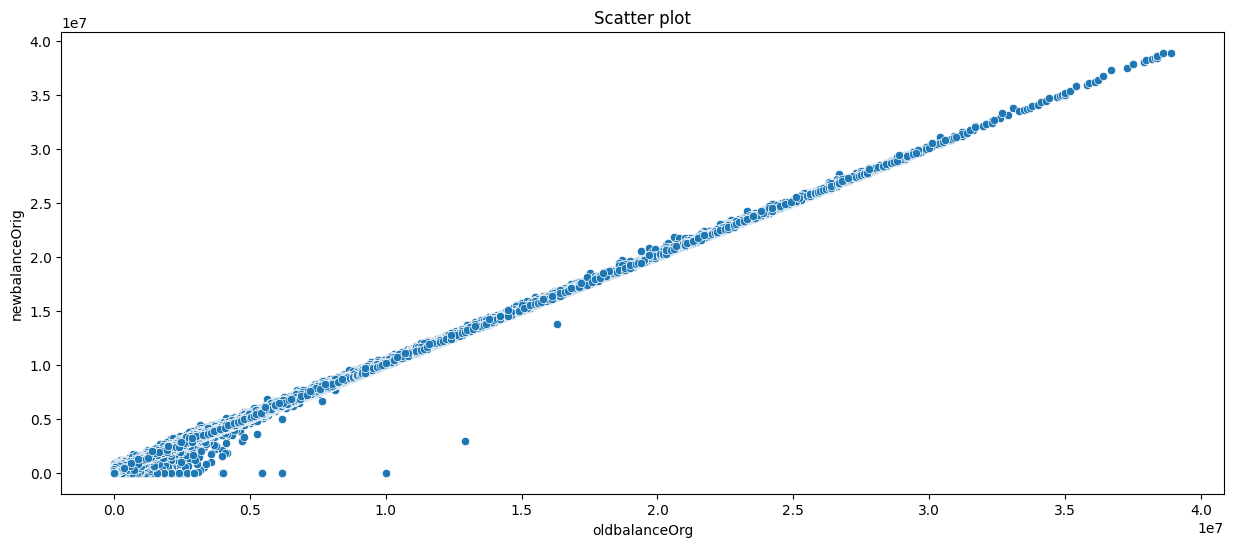

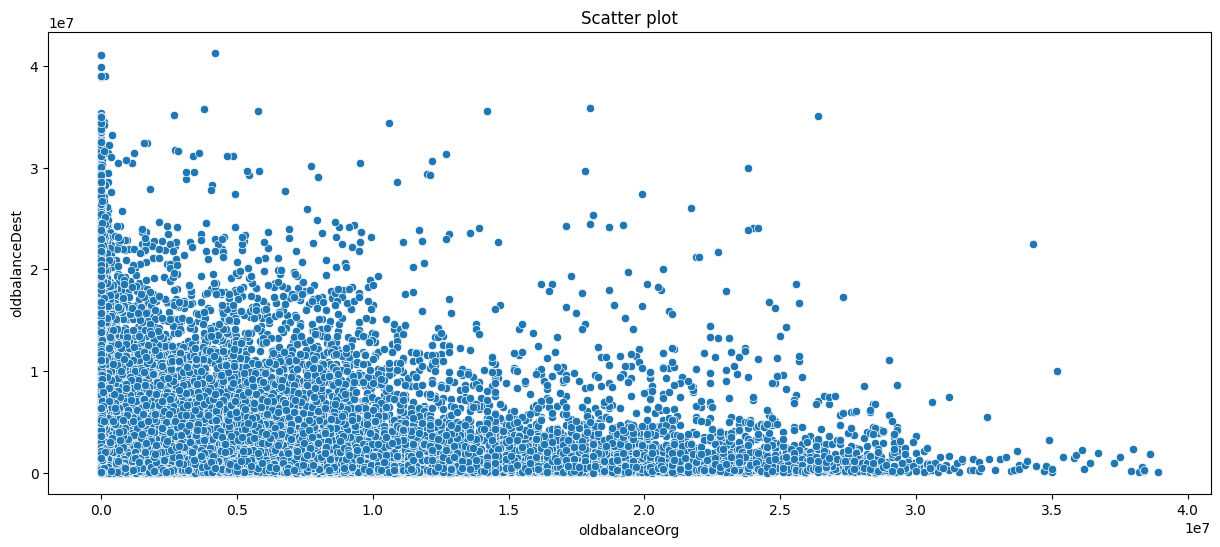

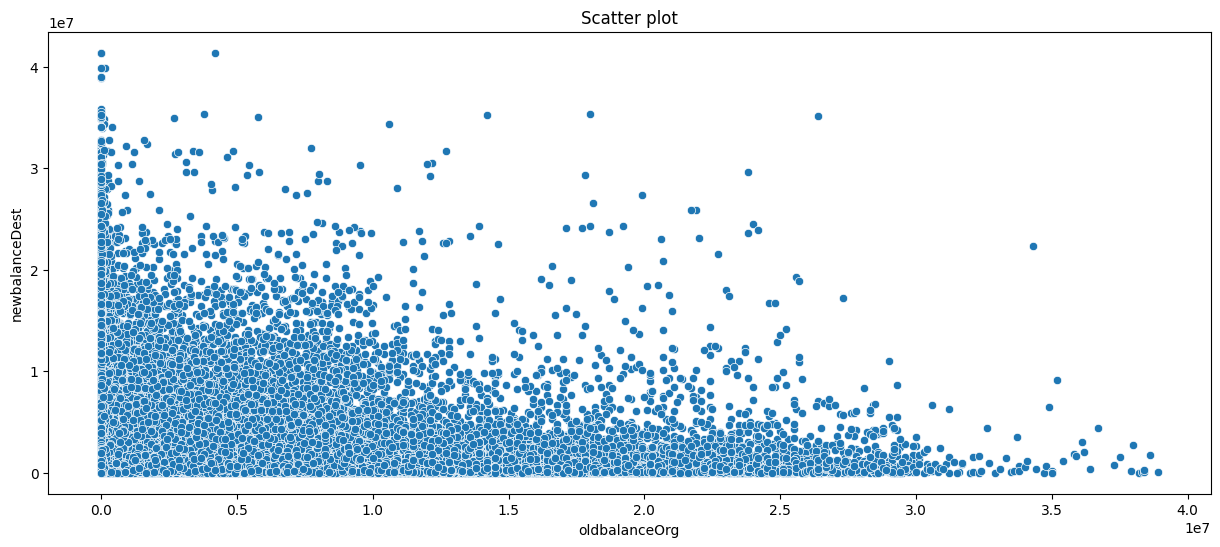

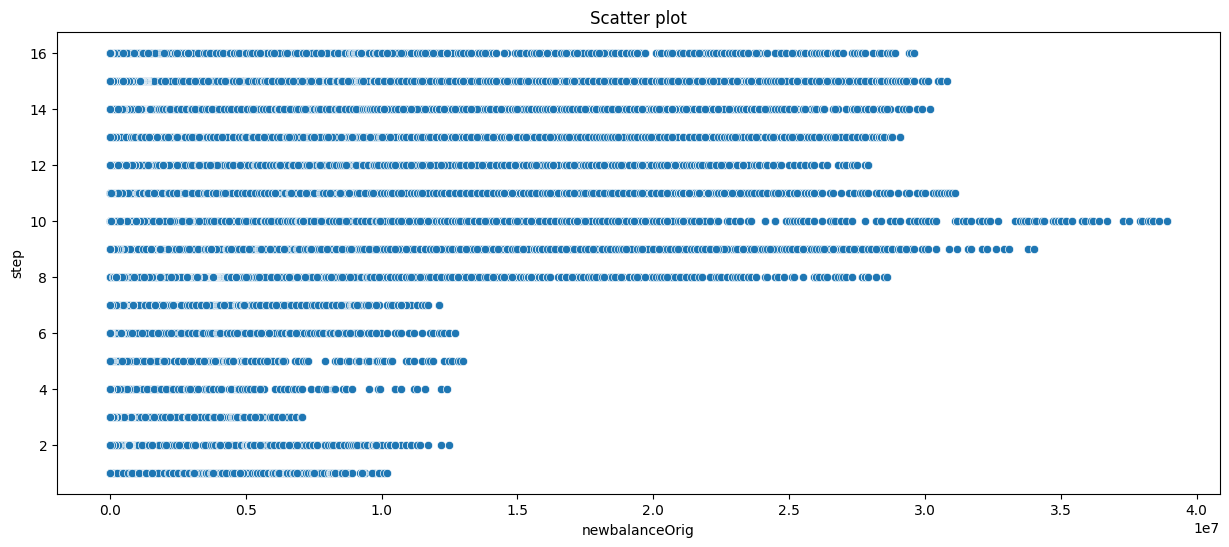

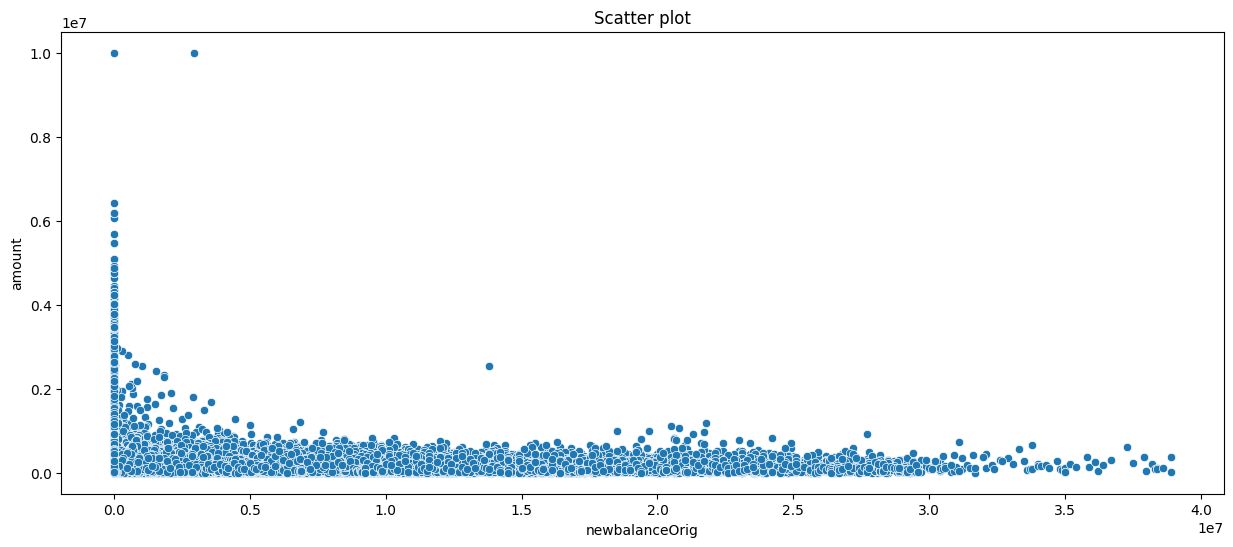

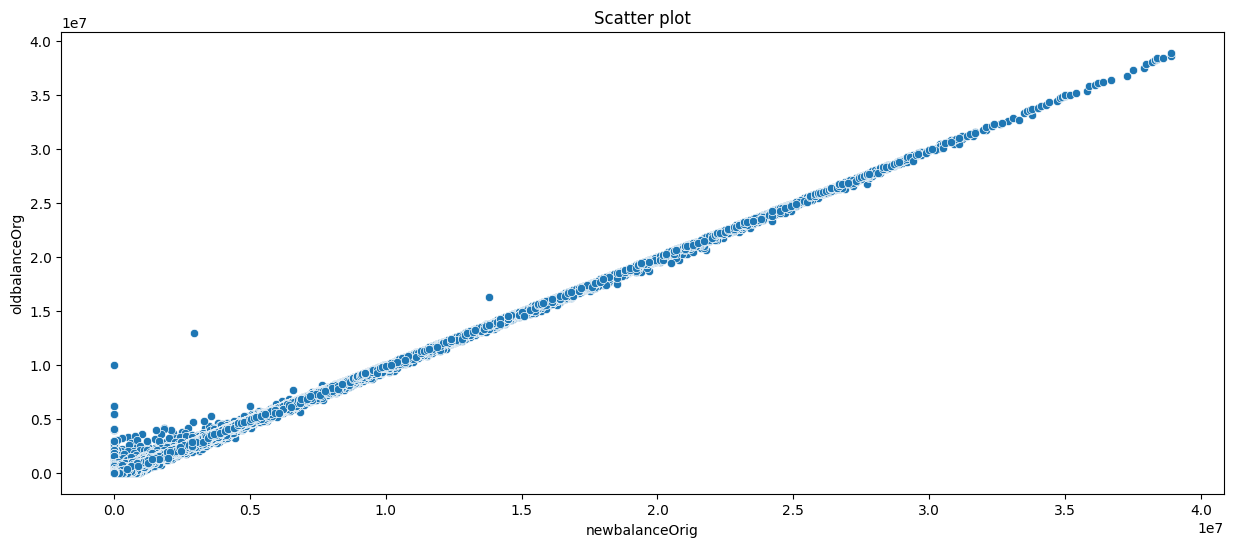

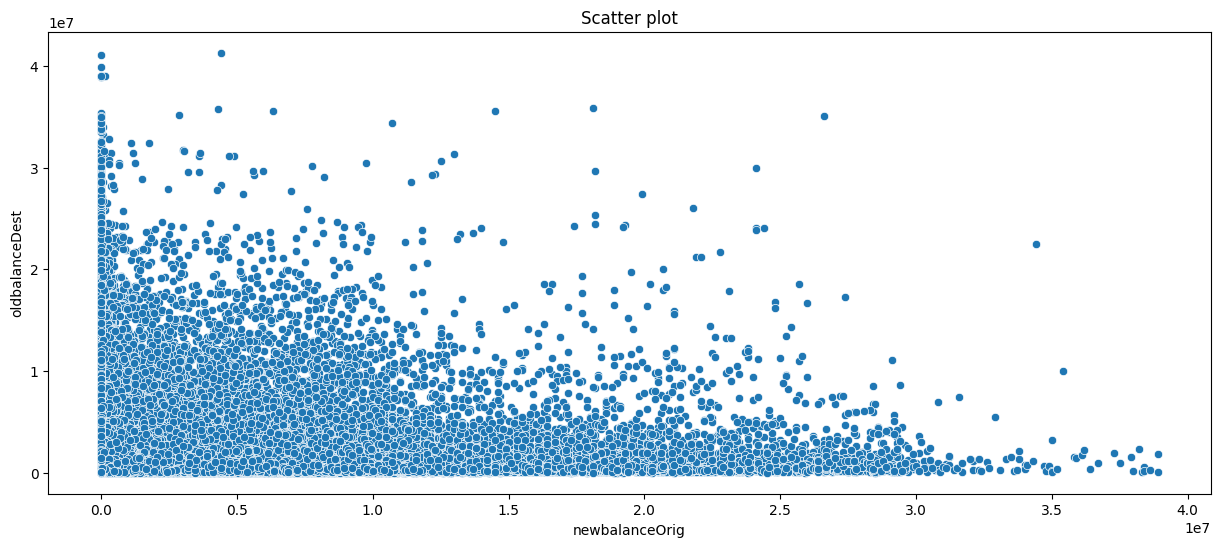

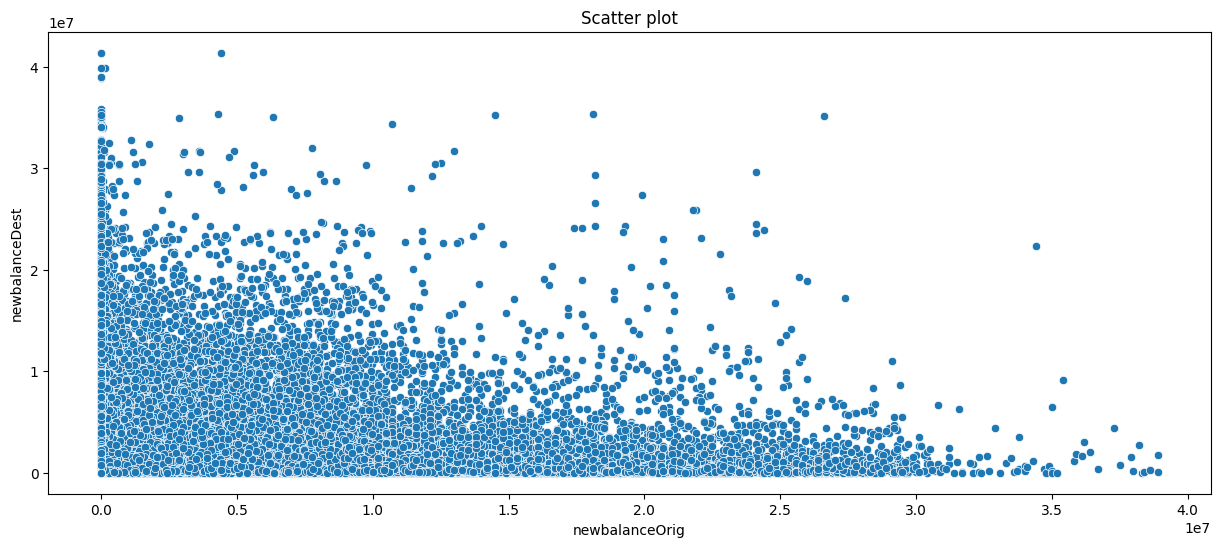

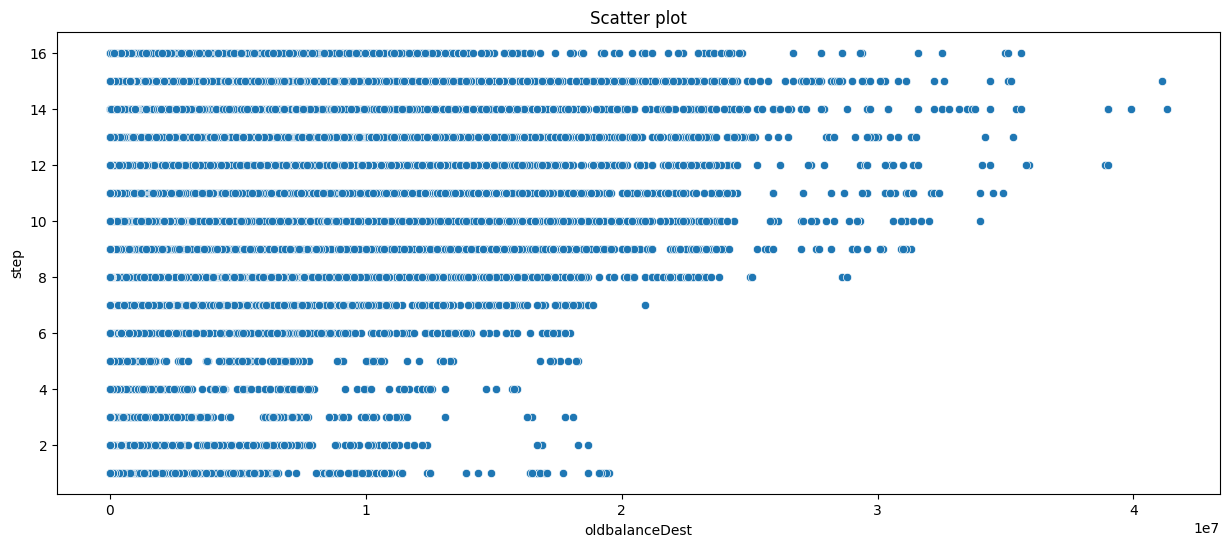

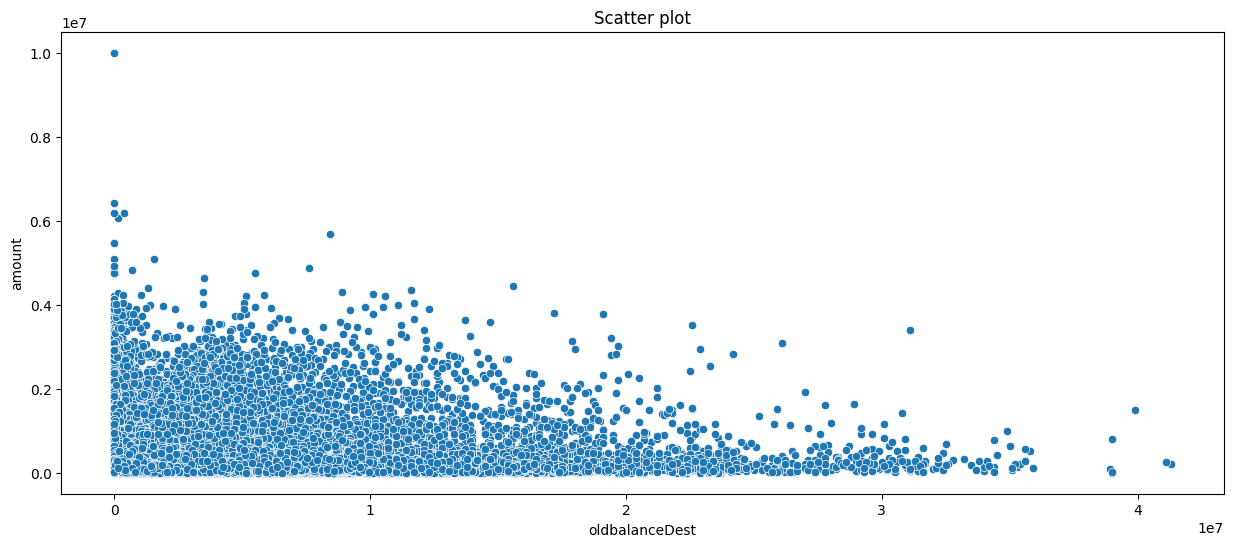

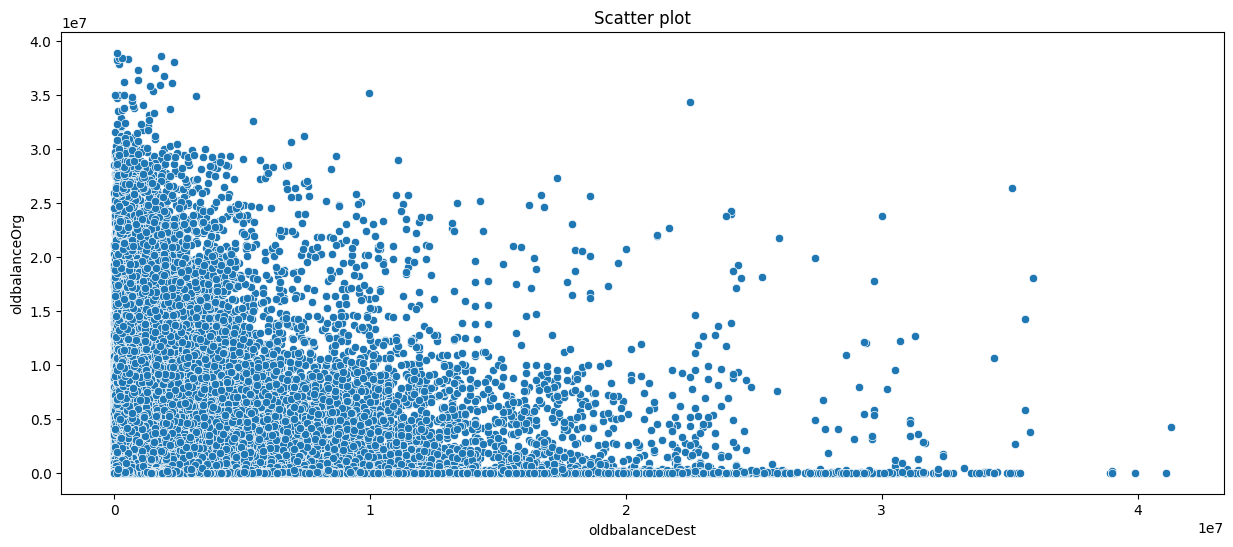

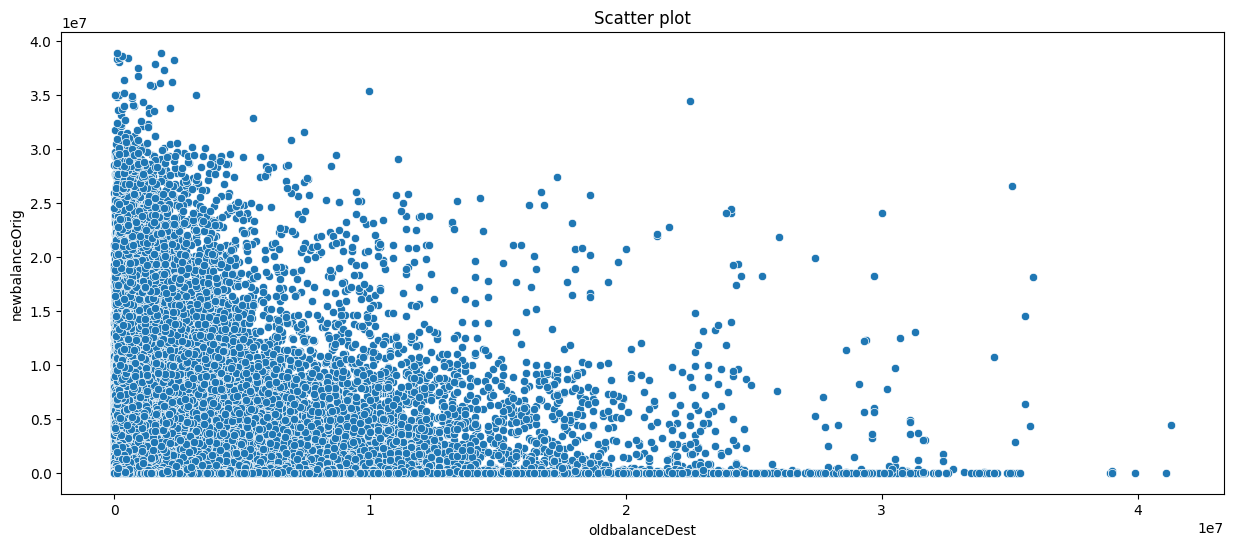

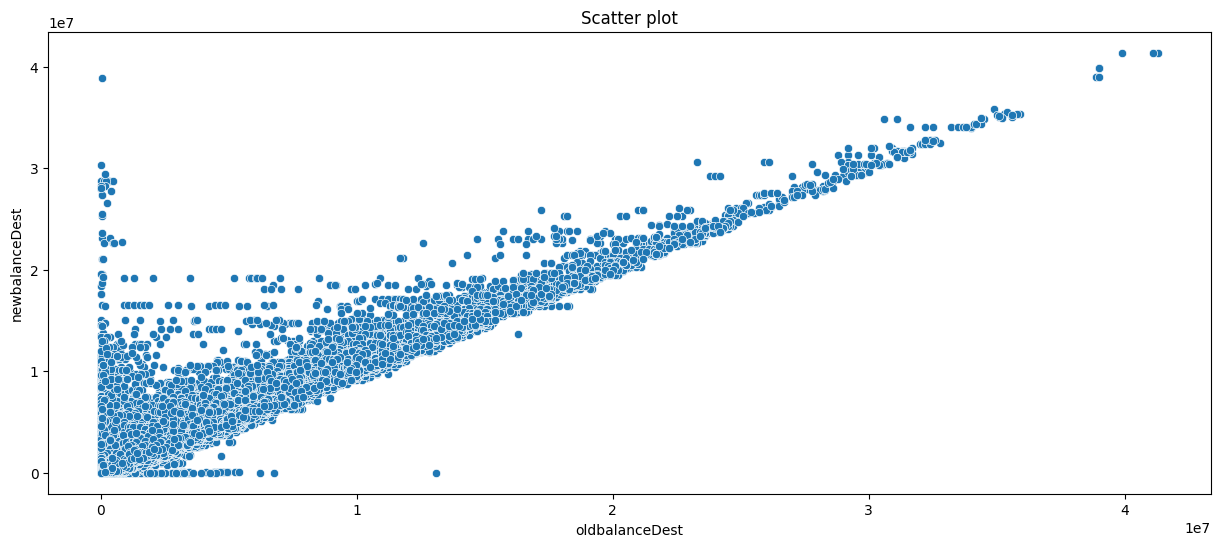

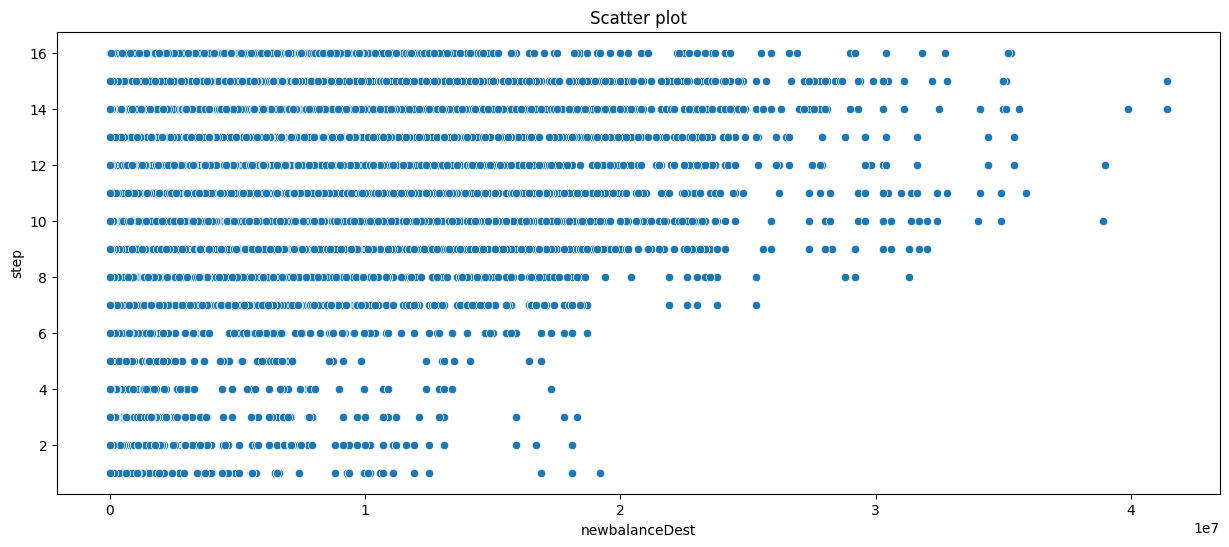

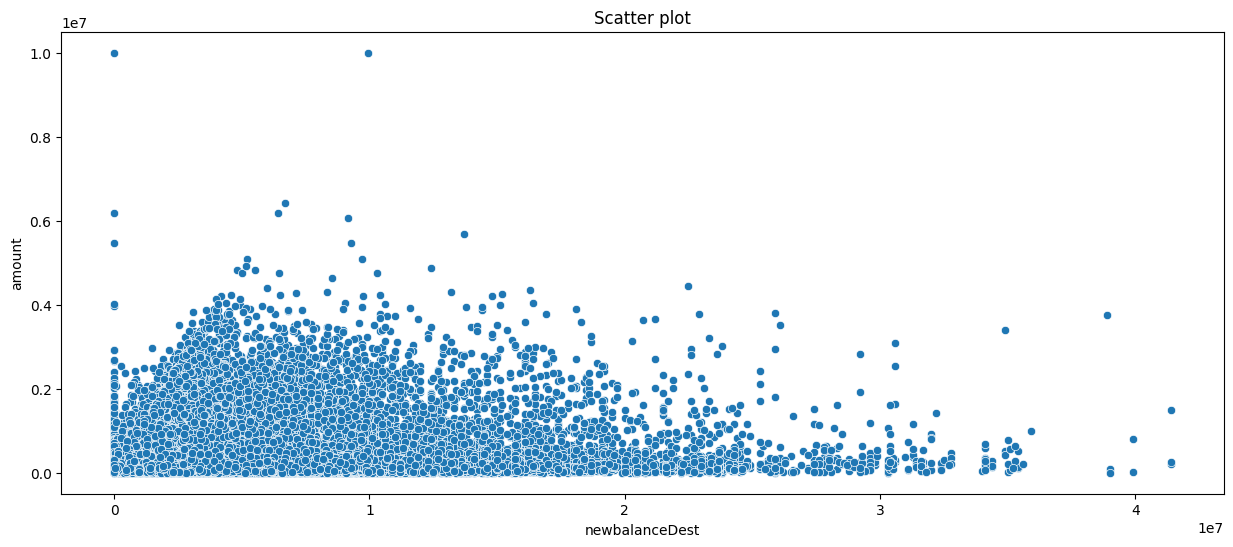

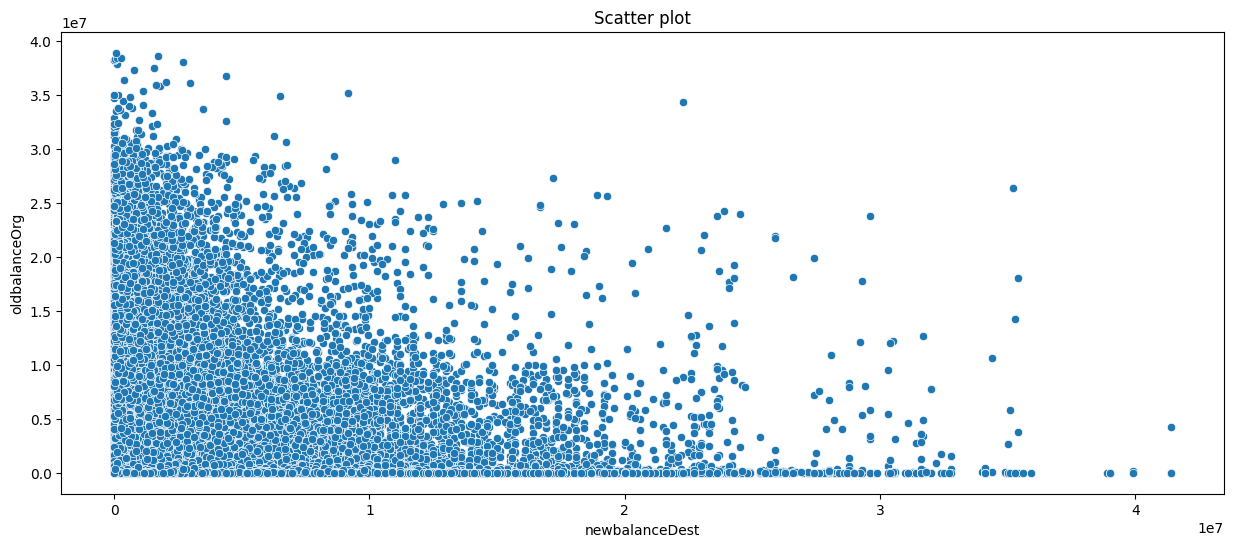

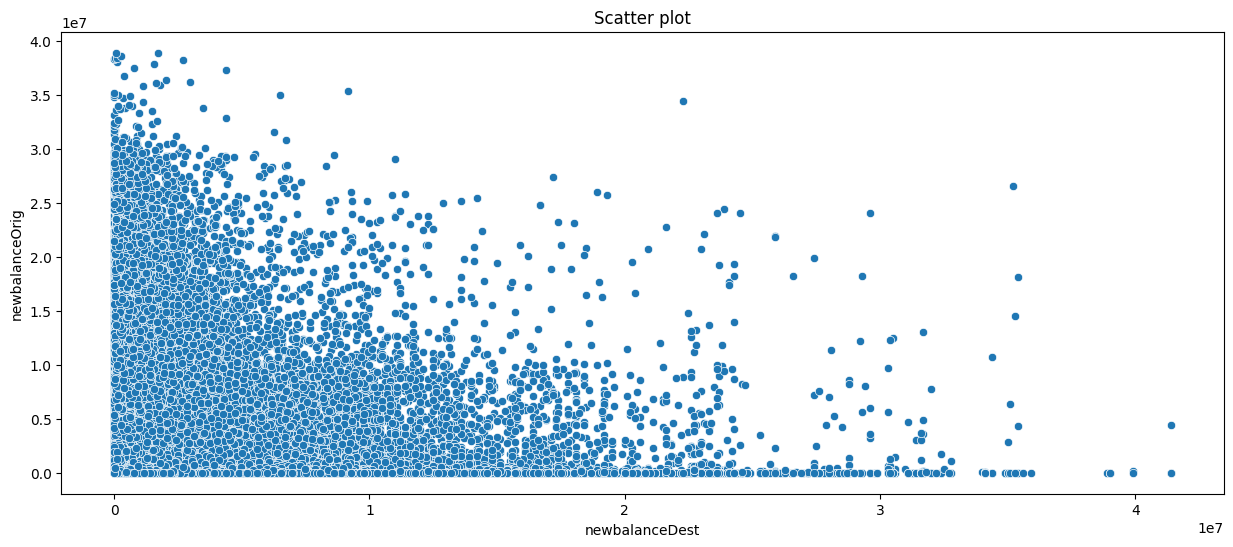

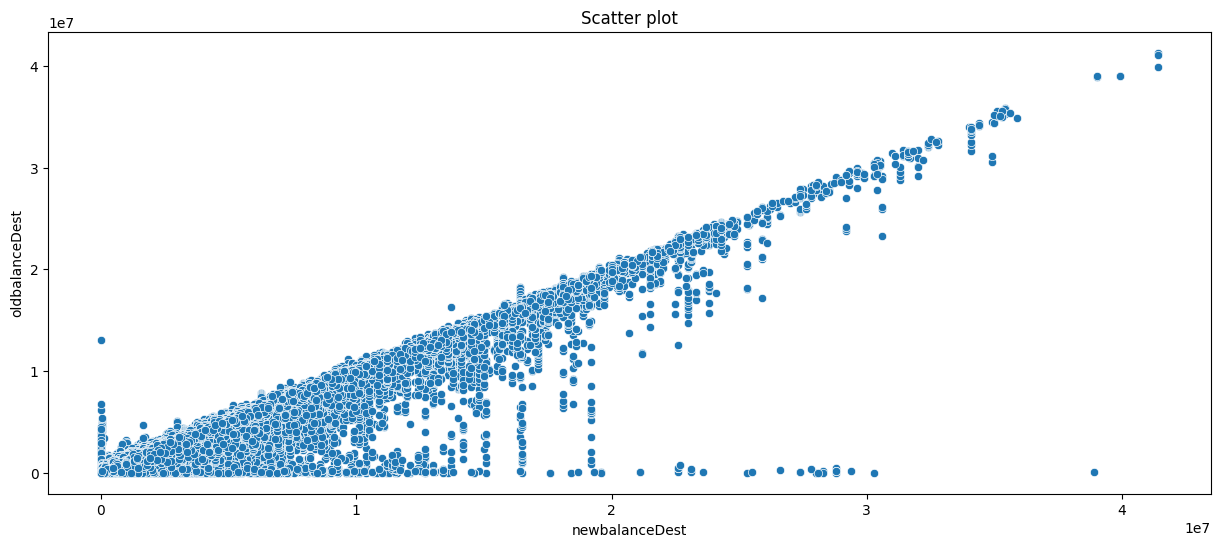

In [ ]:
for i in continuous:
    for j in continuous:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.scatterplot(x=i, y=j, data=df, palette='hls')
          plt.title(f'Scatter plot')
          plt.show()

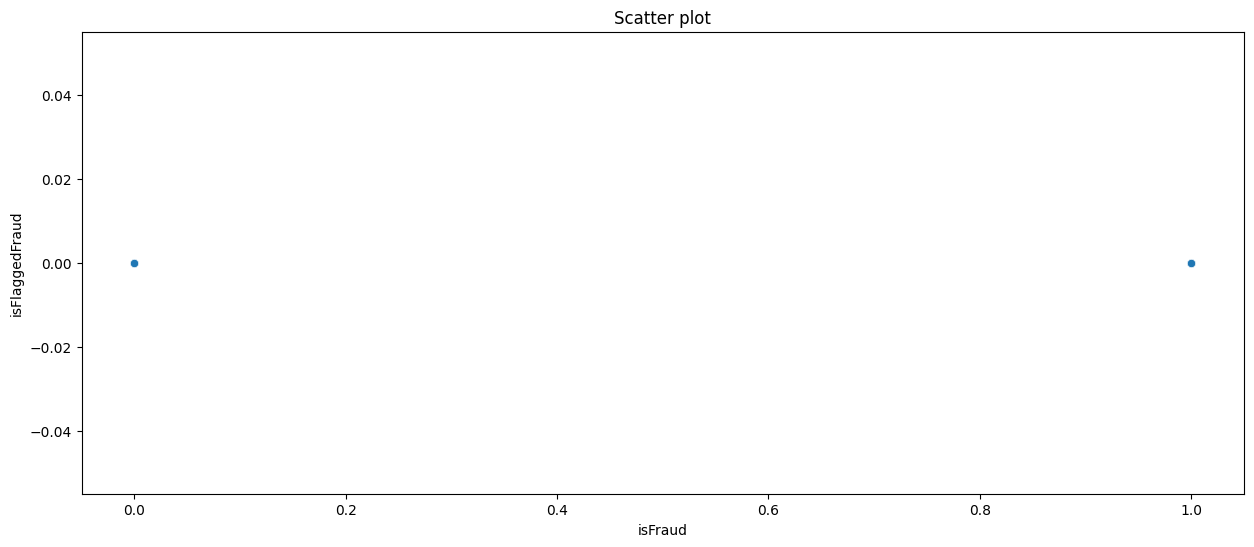

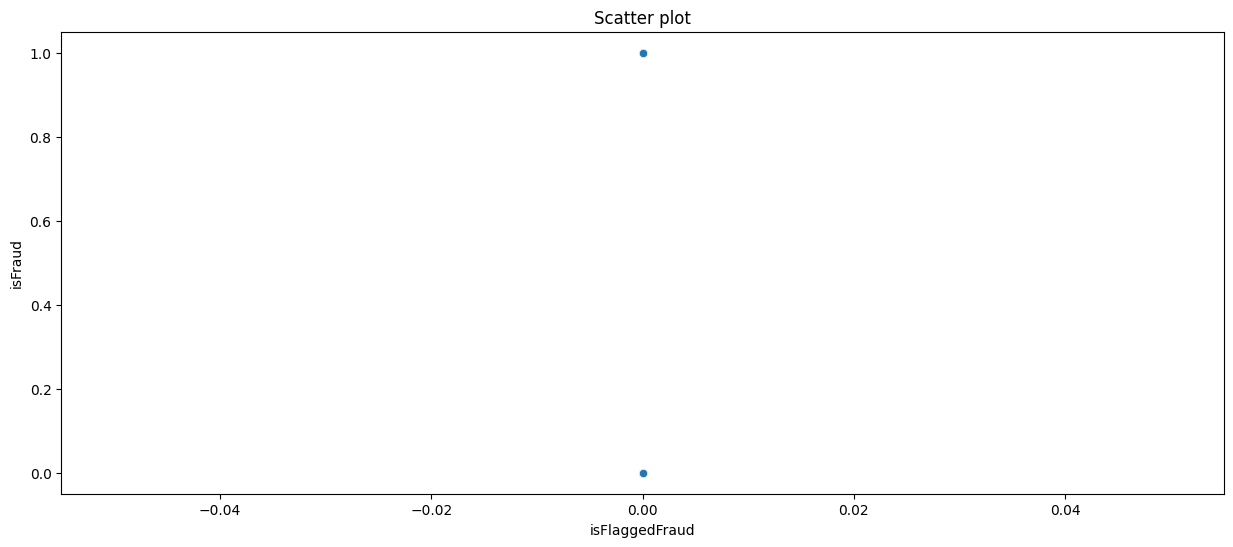

In [ ]:
for i in discrete:
    for j in discrete:
      if i != j:
          plt.figure(figsize=(15, 6))
          sns.scatterplot(x=i, y=j, data=df, palette='hls')
          plt.title(f'Scatter plot')
          plt.show()

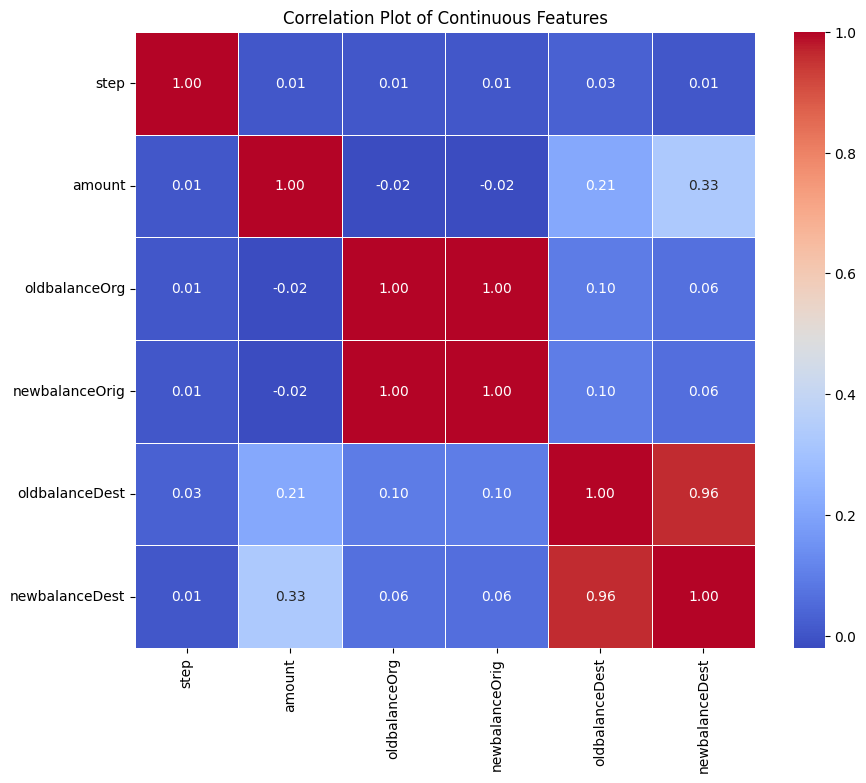

In [ ]:
corr_matrix = df[continuous].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Plot of Continuous Features')
plt.show()

In [ ]:
df = df.drop(['oldbalanceOrg', 'oldbalanceDest'], axis=1)

In [ ]:
df.shape

(316252, 9)

In [ ]:
df = df.drop(['isFlaggedFraud'], axis=1)

In [ ]:
df.shape

(316252, 8)

In [ ]:
df = df.drop(['nameOrig', 'nameDest'], axis=1)

In [ ]:
df.shape

(316252, 6)

In [ ]:
df.columns

Index(['step', 'type', 'amount', 'newbalanceOrig', 'newbalanceDest',
       'isFraud'],
      dtype='object')

In [ ]:
object_types = ['type']

In [ ]:
df_dummies = pd.get_dummies(df[object_types])

In [ ]:
df_dummies

type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER
0              False          False       False          True          False
1              False          False       False          True          False
2              False          False       False         False           True
3              False           True       False         False          False
4              False          False       False          True          False
...              ...            ...         ...           ...            ...
316247         False           True       False         False          False
316248         False           True       False         False          False
316249         False          False       False          True          False
316250         False          False       False         False           True
316251          True          False       False         False          False

[316252 rows x 5 columns]

In [ ]:
df_final = pd.concat([df.drop(object_types, axis=1), df_dummies], axis=1)

In [ ]:
df_final

step     amount  newbalanceOrig  newbalanceDest  isFraud  \
0          1    9839.64       160296.36            0.00      0.0   
1          1    1864.28        19384.72            0.00      0.0   
2          1     181.00            0.00            0.00      1.0   
3          1     181.00            0.00            0.00      1.0   
4          1   11668.14        29885.86            0.00      0.0   
...      ...        ...             ...             ...      ...   
316247    16  173438.10            0.00            0.00      0.0   
316248    16  167414.06            0.00      1928006.99      0.0   
316249    16    5773.11        10224.89            0.00      0.0   
316250    16  288449.12            0.00       788492.84      0.0   
316251    16  108170.87       467887.87        41760.13      0.0   

        type_CASH_IN  type_CASH_OUT  type_DEBIT  type_PAYMENT  type_TRANSFER  
0              False          False       False          True          False  
1              False          False       False          True          False  
2              False          False       False         False           True  
3              False           True       False         False          False  
4              False          False       False          True          False  
...              ...            ...         ...           ...            ...  
316247         False           True       False         False          False  
316248         False           True       False         False          False  
316249         False          False       False          True          False  
316250         False          False       False         False           True  
316251          True          False       False         False          False  

[316252 rows x 10 columns]

In [ ]:
df_final['isFraud'].value_counts()

isFraud
0.0    316065
1.0       187
Name: count, dtype: int64

In [ ]:
X = df_final.drop('isFraud', axis = 1)
y = df_final['isFraud']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression()
log_reg_model.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

log_reg_pred = log_reg_model.predict(X_test)
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

Logistic Regression Accuracy: 0.6208597492529763


In [ ]:
y_pred_train = log_reg_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.624096347445267


In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X_train_resampled, y_train_resampled)

In [ ]:
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)
print("SVM Accuracy:", svm_accuracy)

In [ ]:
y_pred_train = svm_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training Accuracy:", train_accuracy)